## <span style='color:Green'> Problem:1 : Sparkling

For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# this two lines of code is just to increase the size of the display
from IPython.core.display import display, HTML 
display(HTML('<style>.container { width:90% !important; }<\style>'))

### <span style='color:Blue'> 1. Read the data as an appropriate Time Series data and plot the data.</span>

#### 1. Read data

In [2]:
Sparkling_df = pd.read_csv("Sparkling.csv", parse_dates=True, index_col=0)

#### 2.Top rows

In [3]:
Sparkling_df.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

#### 3.Last rows

In [4]:
Sparkling_df.tail()

Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

#### 4.Information about the DataFrame

In [5]:
Sparkling_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


#### 5.Number of rows and columns

In [6]:
Sparkling_df.shape

(187, 1)

* Sparkling dataset has 187 rows and 1 column

#### 6.Check Null Values

In [7]:
Sparkling_df.isnull().sum()

Sparkling    0
dtype: int64

* Sparkling datset has int64(1) without Null values.

#### 7.Plot the Time Series to understand the behaviour of the data.

In [8]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

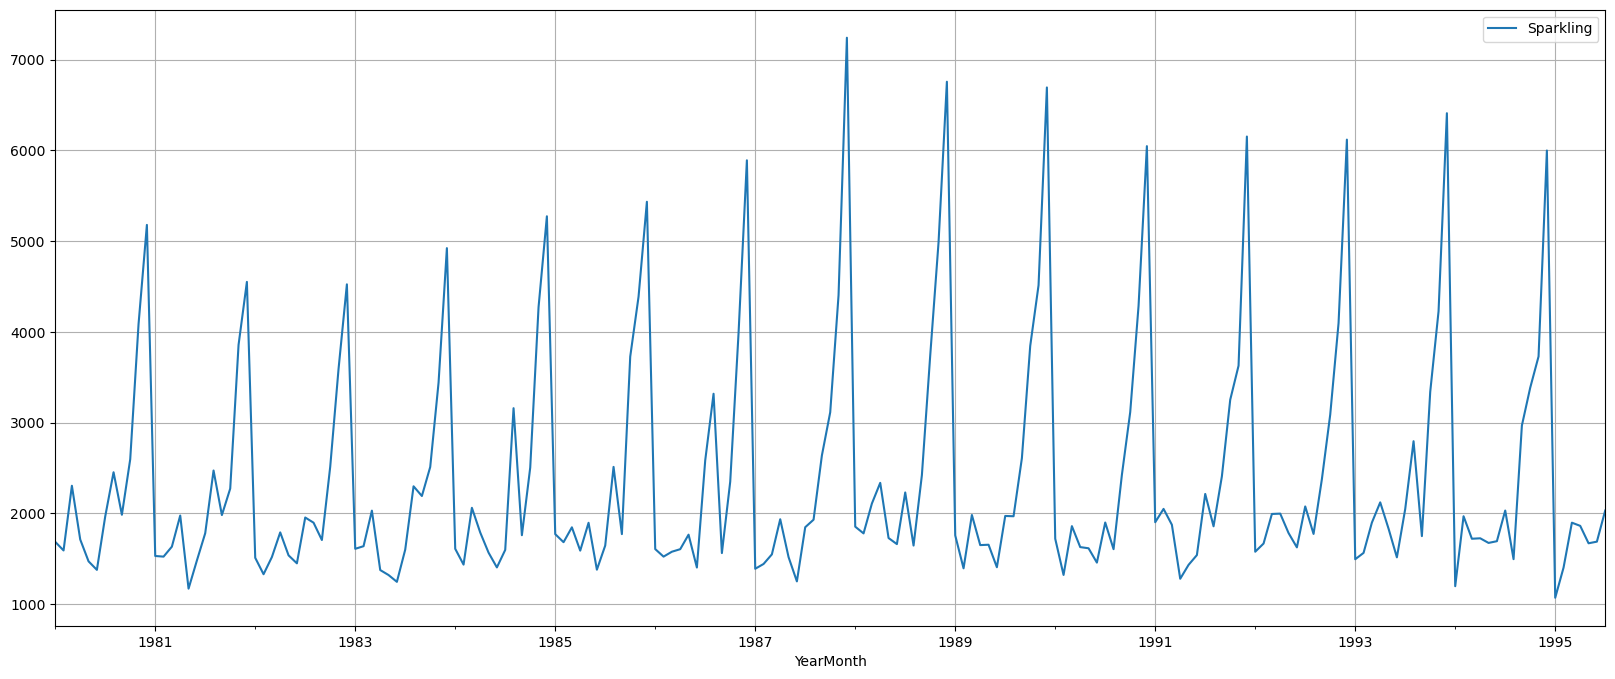

In [9]:
Sparkling_df.plot();
plt.grid();

**We can see that there is an upward trend from 1980 to 1988, then a slight downward trend from 1989 to 1995, with a seasonal pattern associated as well and 1988 is a peek year.**

**Insights:**
- The dataset contains a total of 187 records. 
- It consists of 1 column, which is integer data types. 
- The dataset does not have null values. 
- We can see that there is an upward trend from 1980 to 1988, then a slight downward trend from 1989 to 1995, with a seasonal pattern associated as well and 1988 is a peek year.

### <span style='color:Blue'> 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition. </span>

#### 1.Check the basic measures of descriptive statistics of the Time Series

In [10]:
Sparkling_df.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

* The basic measures of descriptive statistics tell us how the Sales have varied across years. But remember, for this measure of descriptive statistics we have averaged over the whole data without taking the time component into account.**So, Here The average sales of Sparkling Wine per month are around 2402.The maximum sale of the Wine is approx 7242.The minimum sale of the Wine is approx 1070.**

#### 2.Plot a boxplot to understand the spread of accidents across different years and within different months across years.(Create separate columns for the year and month.)

In [11]:
Sparkling_df['Year']=Sparkling_df.index.year
Sparkling_df['Month']=Sparkling_df.index.month
Sparkling_df.head()

Sparkling  Year  Month
YearMonth                         
1980-01-01       1686  1980      1
1980-02-01       1591  1980      2
1980-03-01       2304  1980      3
1980-04-01       1712  1980      4
1980-05-01       1471  1980      5

In [12]:
Sparkling_df.columns=['Sales', 'Year', 'Month']
Sparkling_df.head()

Sales  Year  Month
YearMonth                     
1980-01-01   1686  1980      1
1980-02-01   1591  1980      2
1980-03-01   2304  1980      3
1980-04-01   1712  1980      4
1980-05-01   1471  1980      5

In [13]:
Sparkling_df.head()

Sales  Year  Month
YearMonth                     
1980-01-01   1686  1980      1
1980-02-01   1591  1980      2
1980-03-01   2304  1980      3
1980-04-01   1712  1980      4
1980-05-01   1471  1980      5

In [14]:
Sparkling_df.tail()

Sales  Year  Month
YearMonth                     
1995-03-01   1897  1995      3
1995-04-01   1862  1995      4
1995-05-01   1670  1995      5
1995-06-01   1688  1995      6
1995-07-01   2031  1995      7

In [15]:
round(Sparkling_df.describe().T)

count    mean     std     min     25%     50%     75%     max
Sales  187.0  2402.0  1295.0  1070.0  1605.0  1874.0  2549.0  7242.0
Year   187.0  1987.0     5.0  1980.0  1983.0  1987.0  1991.0  1995.0
Month  187.0     6.0     3.0     1.0     3.0     6.0     9.0    12.0

In [16]:
Sparkling_df.isnull().sum()

Sales    0
Year     0
Month    0
dtype: int64

#### 3.Box Plot

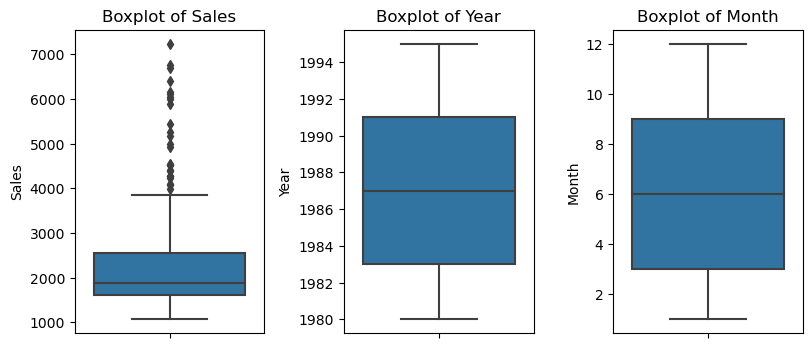

In [17]:
plt.figure(figsize = (19,10))
feature_list = Sparkling_df.columns
for i in range(len(feature_list)):
    plt.subplot(3, 7, i + 1)
    sns.boxplot(y = Sparkling_df[feature_list[i]], data = Sparkling_df)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

* The sales boxplot has outliers, but we are choosing not to treat them as they do not have much effect on the time series model.

#### 3.1 Yearly Boxplot

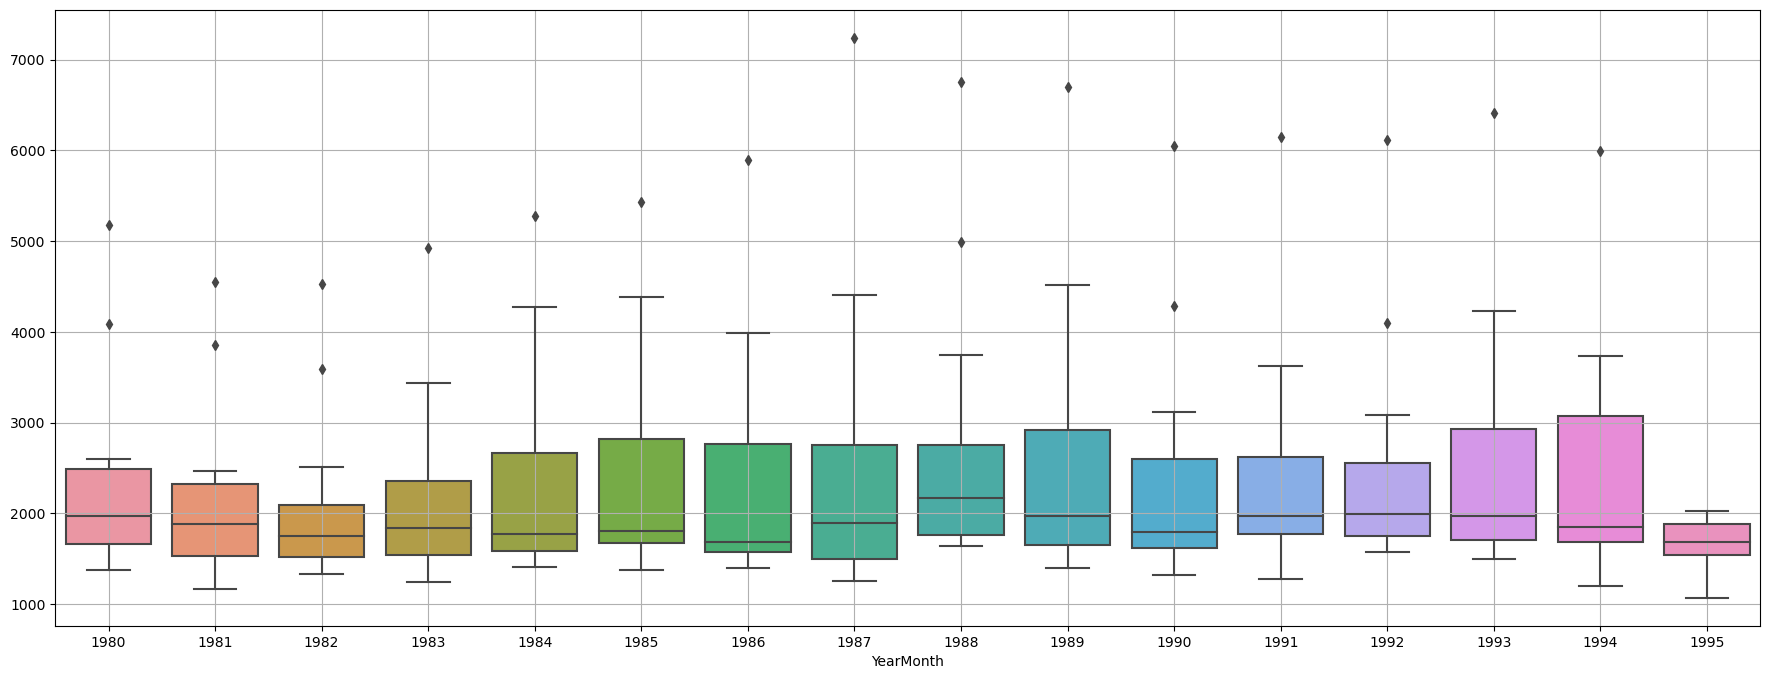

In [18]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = Sparkling_df.index.year,y = Sparkling_df.values[:,0],ax=ax)
plt.grid();

* The yearly boxplots show that sales have increased from 1982 to 1985 and also increased in 1987 and 1989, but after 1989, sales decreased towards the last few years and there was a peak in 1988–1989, and that there has been stability throughout time and there are outliers in every year.

#### 3.2 Monthly Boxplot

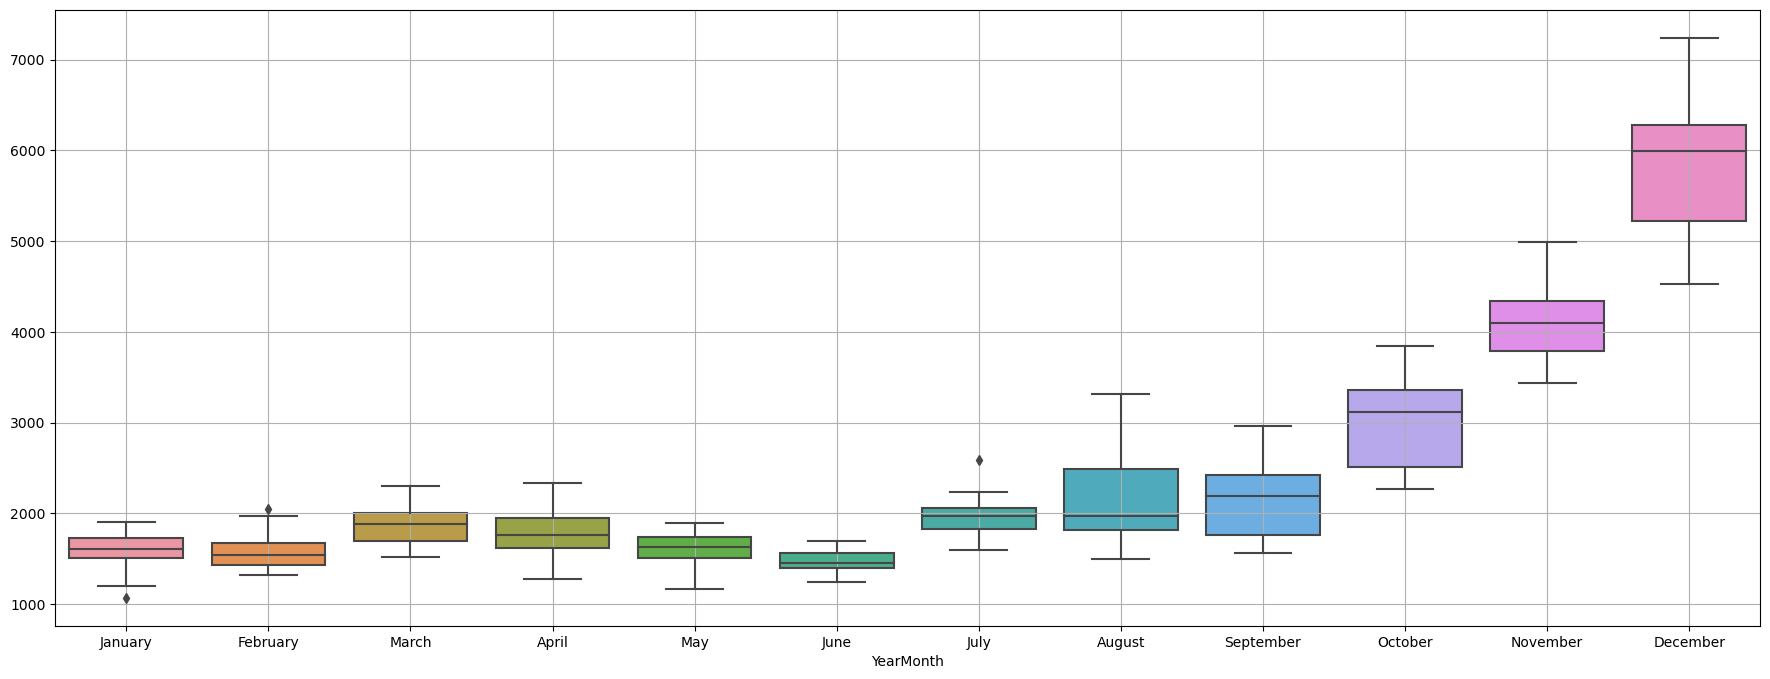

In [19]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = Sparkling_df.index.month_name(),y = Sparkling_df.values[:,0],ax=ax)
plt.grid();

* January sales are the lowest, and December sales are the largest. Sales remain steady from January through July, after which they begin to rise in August. January, February, and July months have outliers.

#### 3.3 Week Days Boxplot

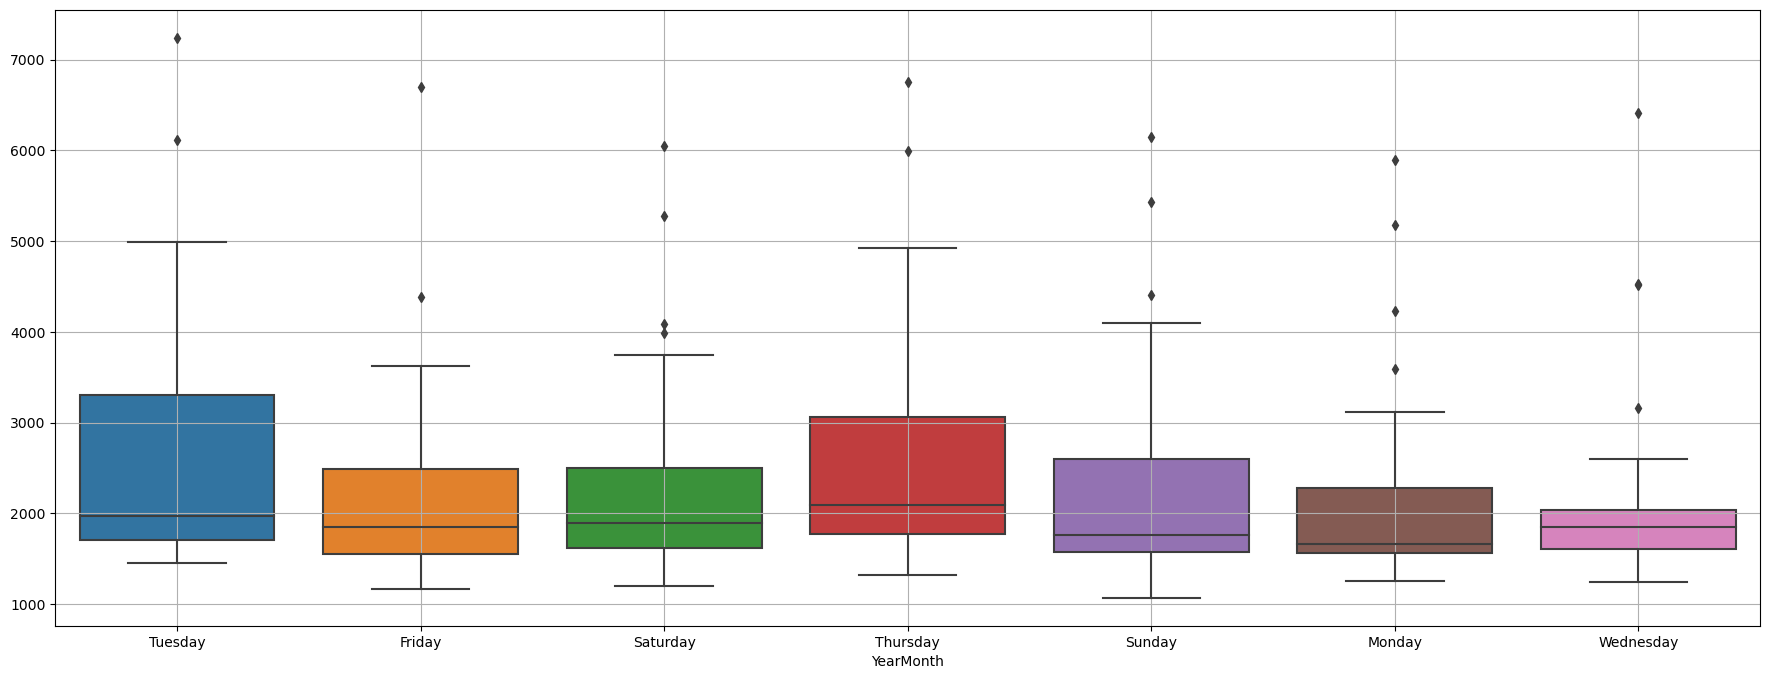

In [20]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = Sparkling_df.index.day_name(),y = Sparkling_df.values[:,0],ax=ax)
plt.grid();

* Sales are higher on Tuesday i.e 5000 and Apporax 5000 sales on Thursday, but Sales are lowest on Wednesday i.e apporax 2600 and outliers exist every day.

#### 4.Plot a graph of monthly sales across years.

In [21]:
monthly_sales_across_years = pd.pivot_table(Sparkling_df, values = 'Sales', columns = Sparkling_df.index.month_name(), index = Sparkling_df.index.year)
monthly_sales_across_years

YearMonth   April  August  December  February  January    July    June  \
YearMonth                                                                
1980       1712.0  2453.0    5179.0    1591.0   1686.0  1966.0  1377.0   
1981       1976.0  2472.0    4551.0    1523.0   1530.0  1781.0  1480.0   
1982       1790.0  1897.0    4524.0    1329.0   1510.0  1954.0  1449.0   
1983       1375.0  2298.0    4923.0    1638.0   1609.0  1600.0  1245.0   
1984       1789.0  3159.0    5274.0    1435.0   1609.0  1597.0  1404.0   
1985       1589.0  2512.0    5434.0    1682.0   1771.0  1645.0  1379.0   
1986       1605.0  3318.0    5891.0    1523.0   1606.0  2584.0  1403.0   
1987       1935.0  1930.0    7242.0    1442.0   1389.0  1847.0  1250.0   
1988       2336.0  1645.0    6757.0    1779.0   1853.0  2230.0  1661.0   
1989       1650.0  1968.0    6694.0    1394.0   1757.0  1971.0  1406.0   
1990       1628.0  1605.0    6047.0    1321.0   1720.0  1899.0  1457.0   
1991       1279.0  1857.0    6153.0    2049.0   1902.0  2214.0  1540.0   
1992       1997.0  1773.0    6119.0    1667.0   1577.0  2076.0  1625.0   
1993       2121.0  2795.0    6410.0    1564.0   1494.0  2048.0  1515.0   
1994       1725.0  1495.0    5999.0    1968.0   1197.0  2031.0  1693.0   
1995       1862.0     NaN       NaN    1402.0   1070.0  2031.0  1688.0   

YearMonth   March     May  November  October  September  
YearMonth                                                
1980       2304.0  1471.0    4087.0   2596.0     1984.0  
1981       1633.0  1170.0    3857.0   2273.0     1981.0  
1982       1518.0  1537.0    3593.0   2514.0     1706.0  
1983       2030.0  1320.0    3440.0   2511.0     2191.0  
1984       2061.0  1567.0    4273.0   2504.0     1759.0  
1985       1846.0  1896.0    4388.0   3727.0     1771.0  
1986       1577.0  1765.0    3987.0   2349.0     1562.0  
1987       1548.0  1518.0    4405.0   3114.0     2638.0  
1988       2108.0  1728.0    4988.0   3740.0     2421.0  
1989       1982.0  1654.0    4514.0   3845.0     2608.0  
1990       1859.0  1615.0    4286.0   3116.0     2424.0  
1991       1874.0  1432.0    3627.0   3252.0     2408.0  
1992       1993.0  1783.0    4096.0   3088.0     2377.0  
1993       1898.0  1831.0    4227.0   3339.0     1749.0  
1994       1720.0  1674.0    3729.0   3385.0     2968.0  
1995       1897.0  1670.0       NaN      NaN        NaN

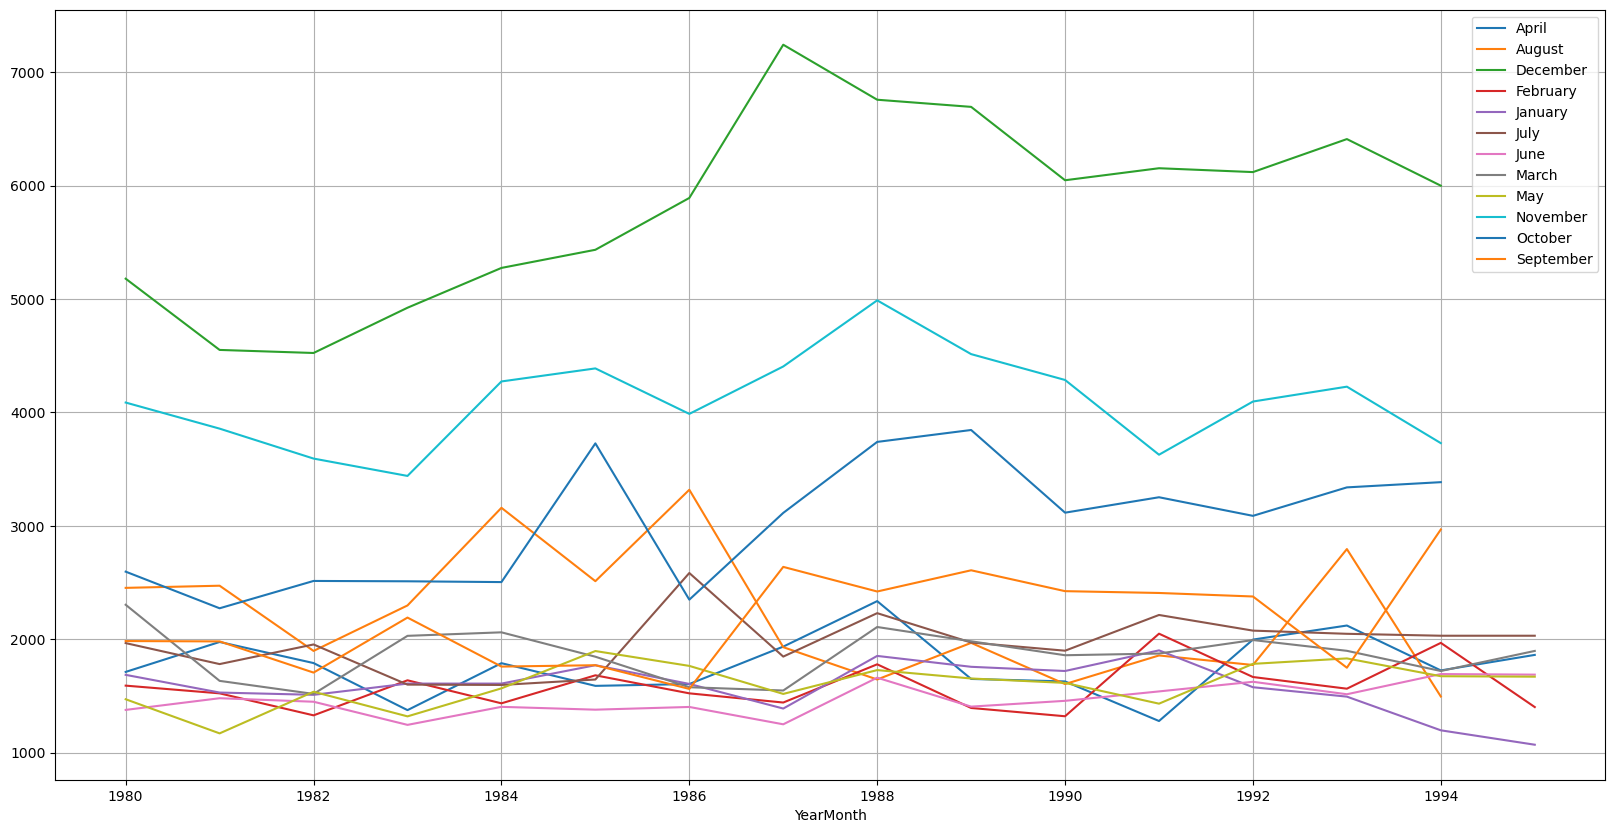

In [22]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

* December has the highest sales across the years. According to the graph, 1987 is the peak year because sales were more than 7,000 in December.

#### 5.Plot a time series monthplot

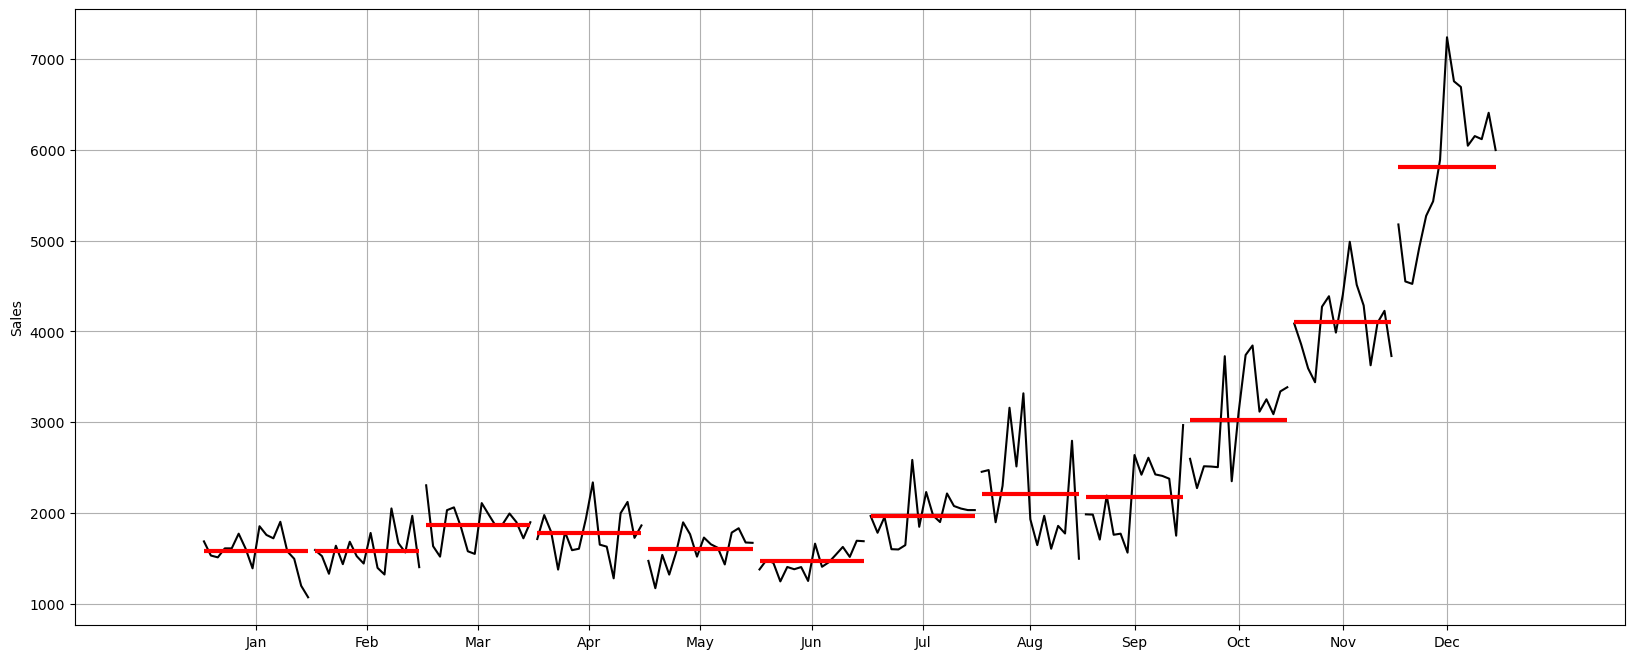

In [23]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(Sparkling_df['Sales'],ylabel='Sales')
plt.grid();

* Sales are seen to increase and decrease across various months, but in December, sales are highly increasing.

#### 6.Plot ECDF: Empirical Cumulative Distribution Function

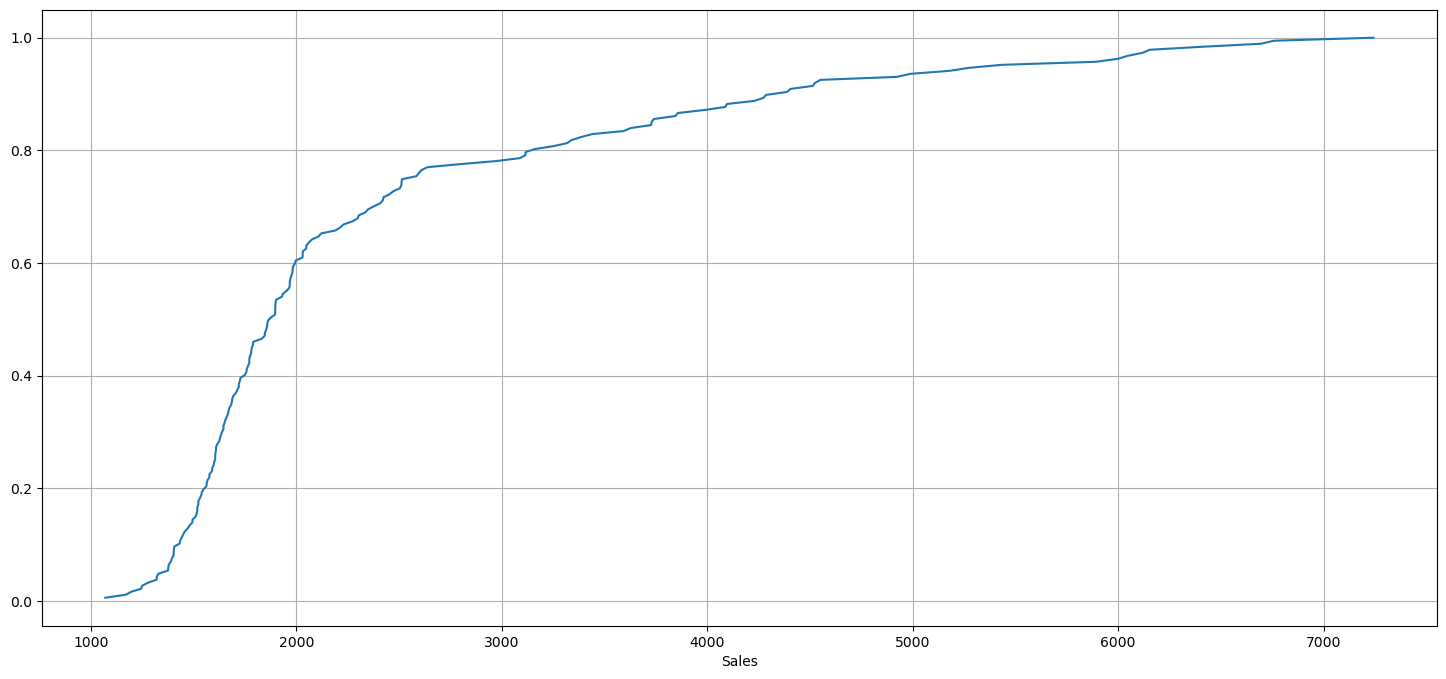

In [24]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(Sparkling_df['Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

* More than 50% of sales are below 2000 sales, above 80% of sales are more than 3000 sales, and 100% of sales are 7000 sales.

#### 7.Plot the average Sales per month and the month on month percentage change of Sales.

<Axes: xlabel='YearMonth'>

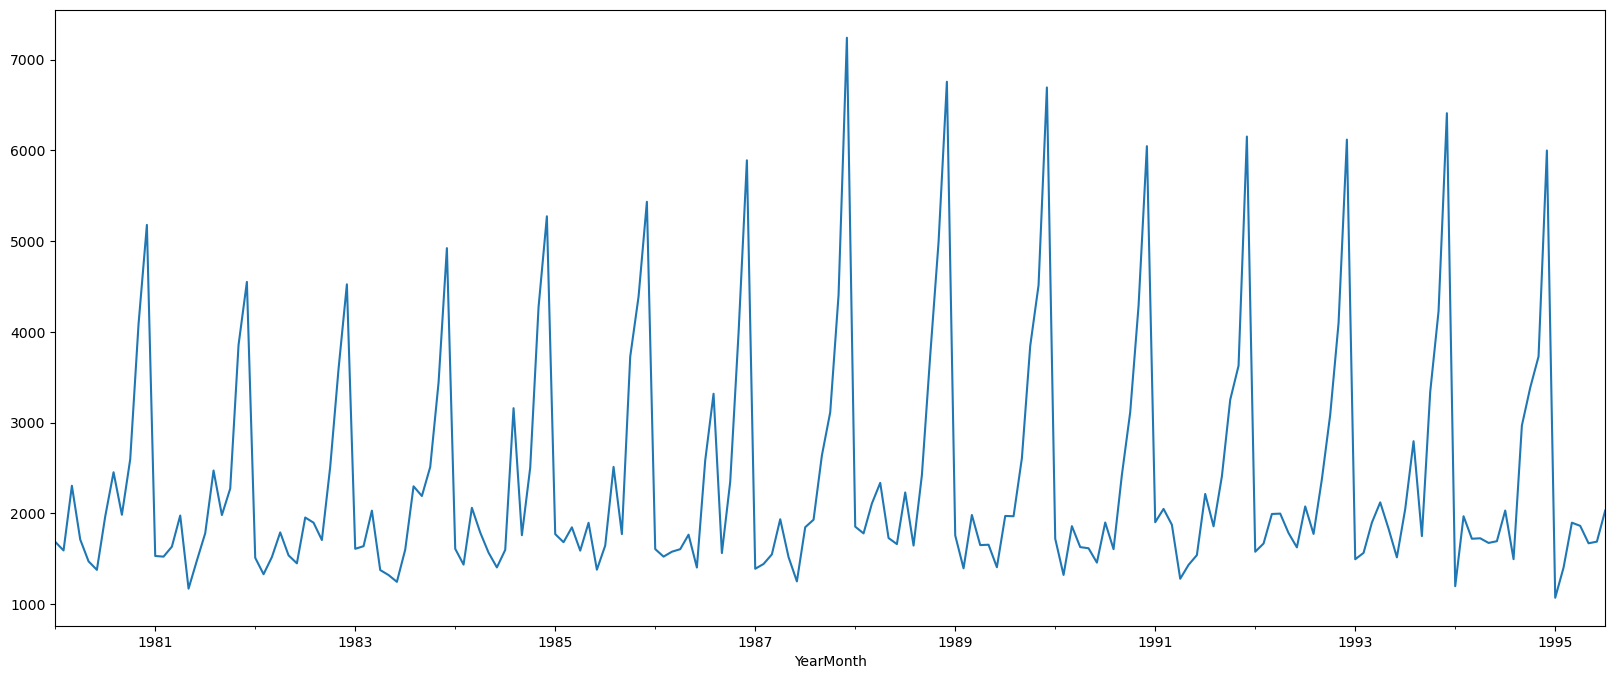

In [25]:
Sparkling_df['Sales'].plot()

<Axes: xlabel='YearMonth'>

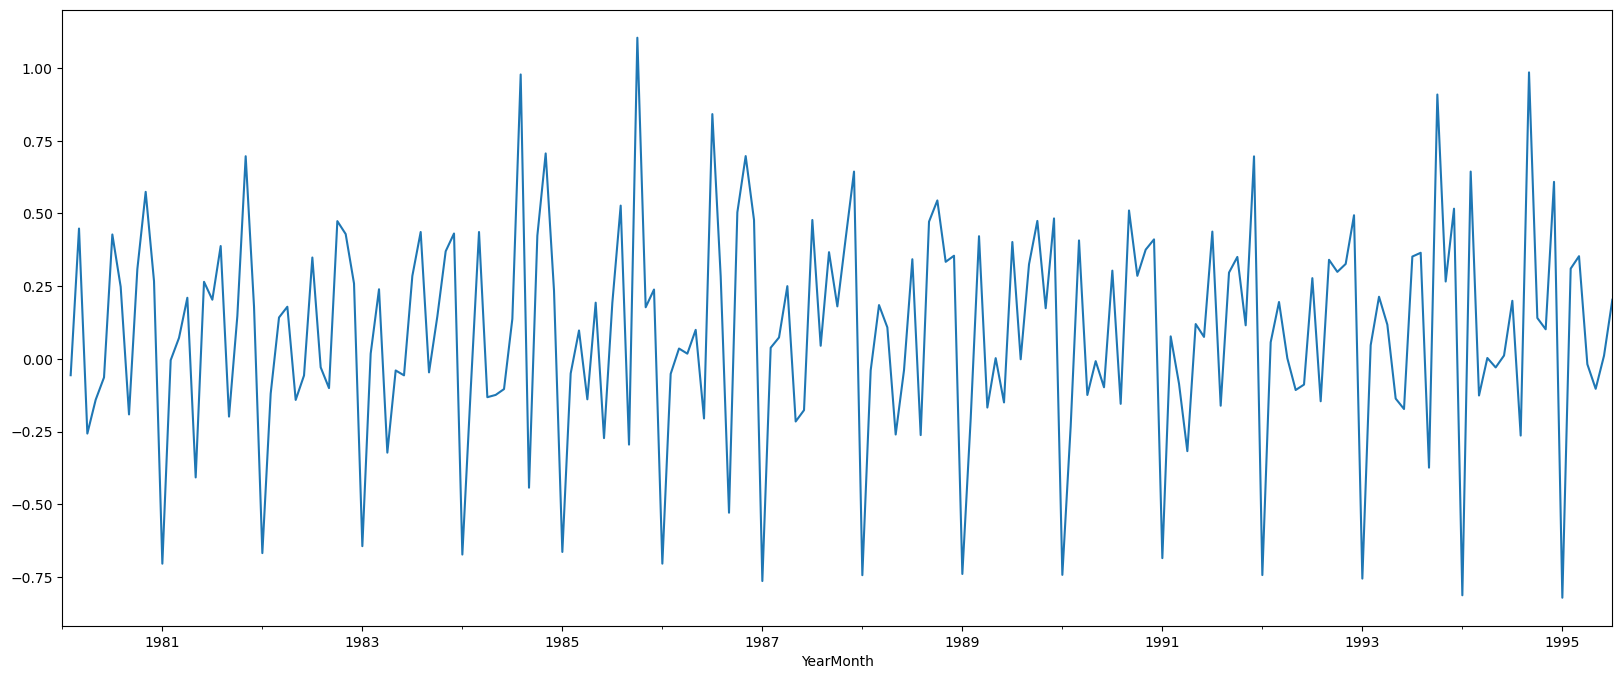

In [26]:
Sparkling_df['Sales'].pct_change().plot()

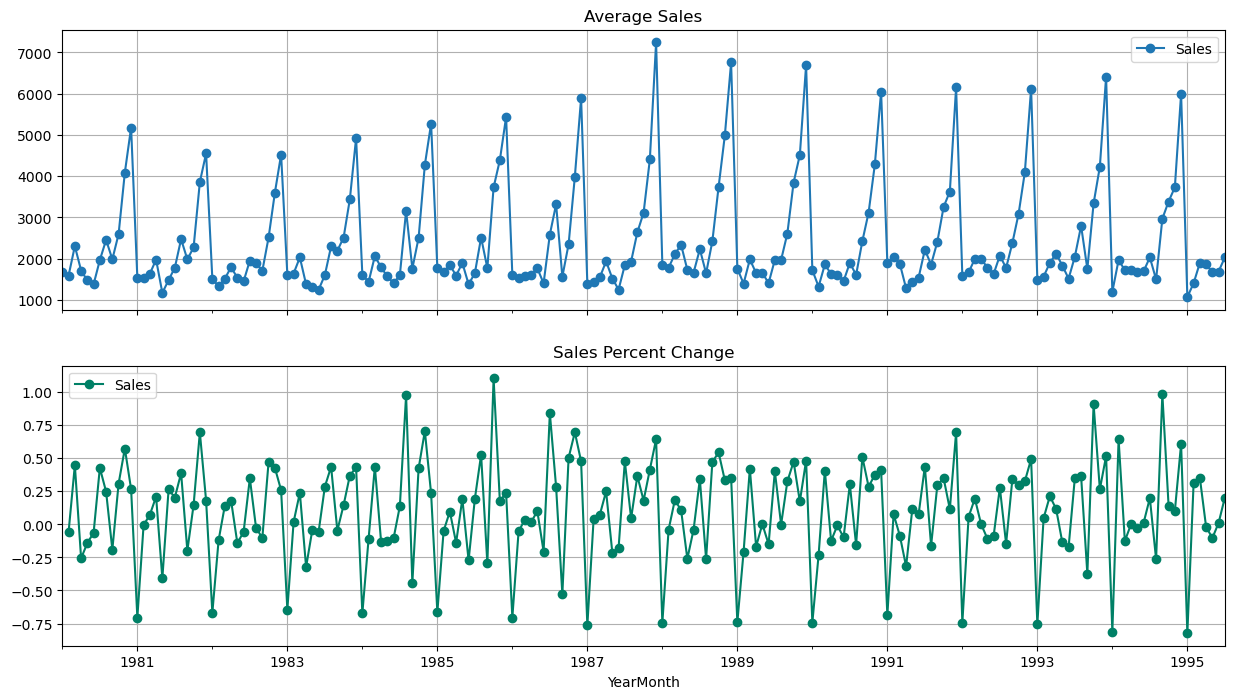

In [27]:
# group by date and get average Sales, and percent change
average    = Sparkling_df.groupby(Sparkling_df.index)["Sales"].mean()
pct_change = Sparkling_df.groupby(Sparkling_df.index)["Sales"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Sales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Sales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sales Percent Change",grid=True)

* The above two graphs tells us the Average 'Sales' and the Percentage change of 'Sales' with respect to the time.

#### 8.Decompose the Time Series and plot the different components.

In [28]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

#### 8.1 Additive Decomposition

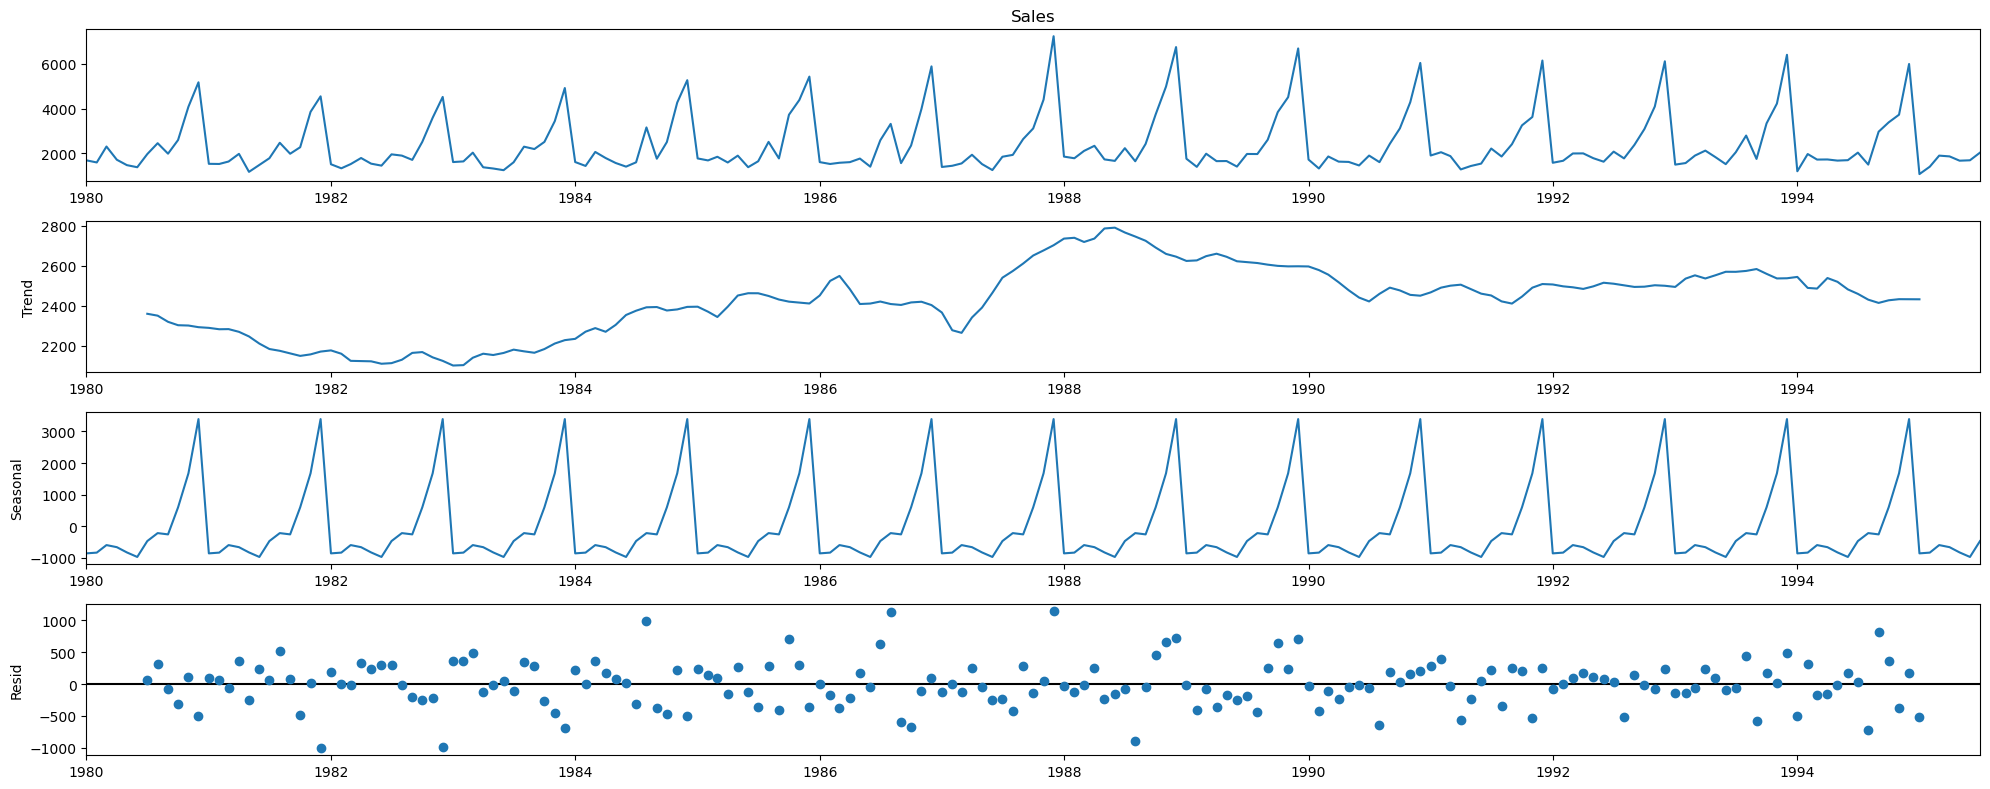

In [29]:
decomposition = seasonal_decompose(Sparkling_df['Sales'],model='additive')
decomposition.plot();

* Years of peak: 1988–1989, it demonstrates that the trend has weakened from 1988 and 1989. Instead of being in a straight line, residue is dispersed. Seasonality and trends are both present

In [30]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -854.260599
1980-02-01    -830.350678
1980-03-01    -592.356630
1980-04-01    -658.490559
1980-05-01    -824.416154
1980-06-01    -967.434011
1980-07-01    -465.502265
1980-08-01    -214.332821
1980-09-01    -254.677265
1980-10-01     599.769957
1980-11-01    1675.067179
1980-12-01    3386.983846
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01    -81.864401
1980-10-01   -307.353290


#### 8.2 Multiplicative Decomposition

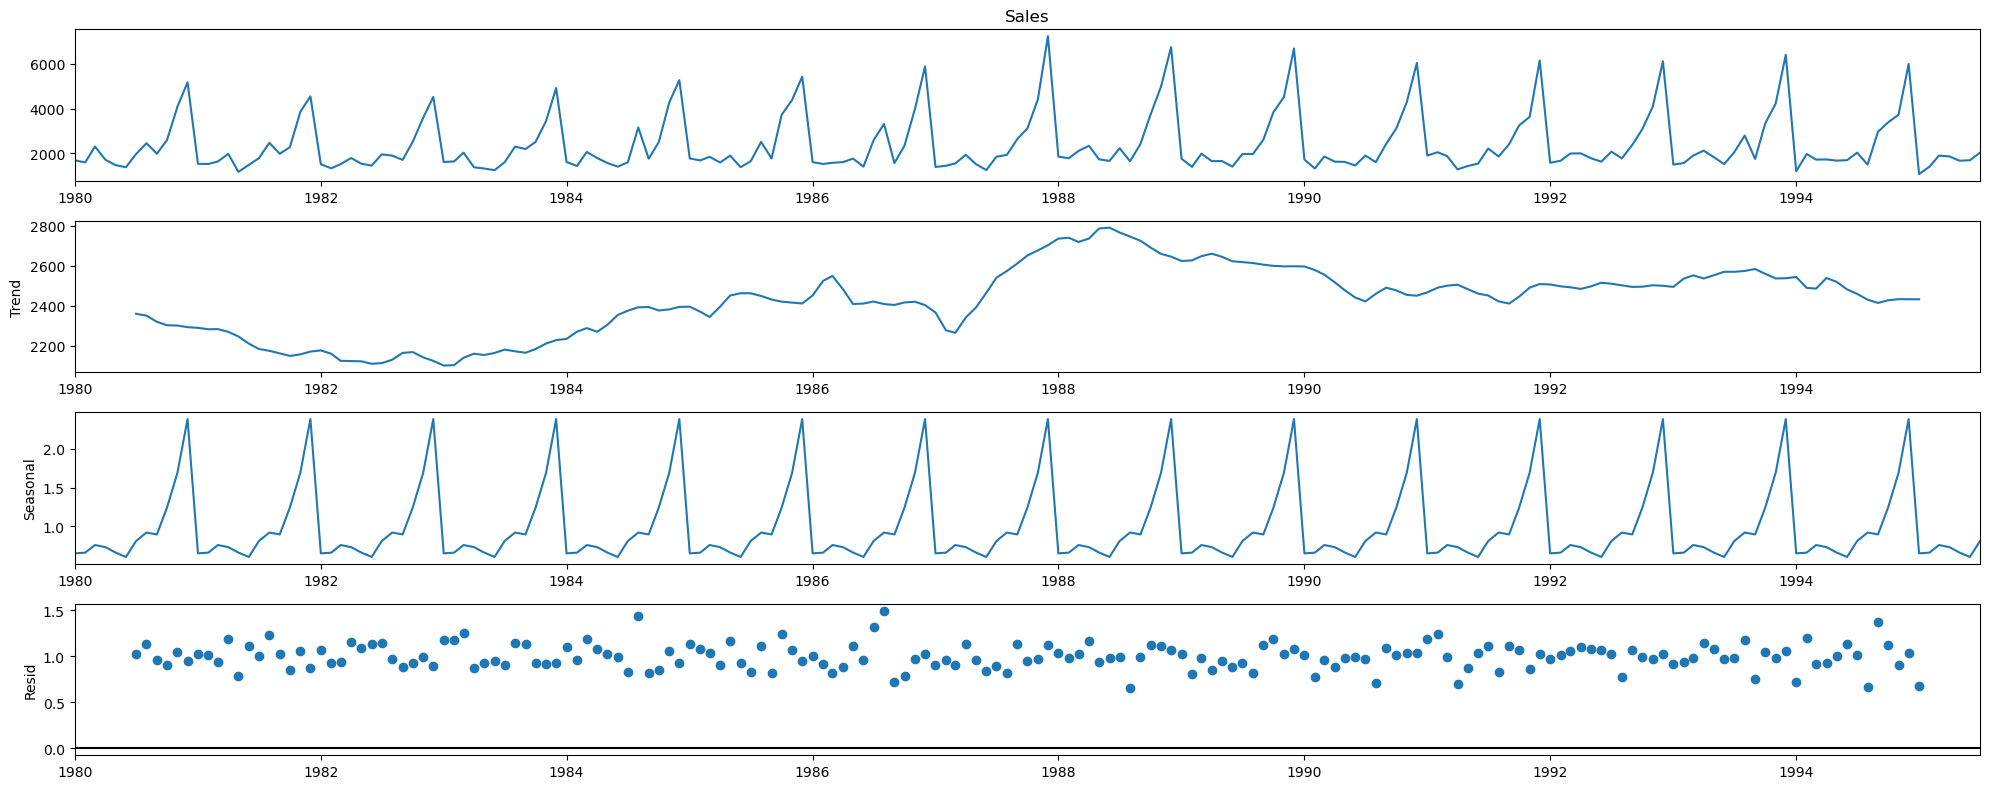

In [31]:
decomposition = seasonal_decompose(Sparkling_df['Sales'],model='multiplicative')
decomposition.plot();

* Peak years is 1988-1989. It also demonstrates the trend's downward movement in the years following 1988–1989. The residue is dispersed and roughly follows a straight path. There is seasonality as well as a trend. Additive is 0 to 1000, whereas live is 0 to 1. Because of the multiplicative model's shorter residual range and more stable residual plot, it is chosen.

In [32]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
1980-11-01    1.050423
1980-12-01    0.946770
Name: resi

**Insigths:**
- The sales data exhibits clear seasonal patterns with a notable increase in December sales across all years. Additionally, while there's an overall upward trend until the peak years of 1988–1989, there's a subsequent decline in sales in the years that follow. The choice of the multiplicative model is supported by the observed data patterns, showcasing both seasonality and trend effects.

### <span style='color:Blue'> 3. Split the data into training and test. The test data should start in 1991.</span>

* As per the instructions given in the project we have split the data, around 1991.With training data from 1980 to 1990 December. Test data starts from the first month of January 1991 till the end.

In [33]:
# Split the data into training and testing sets
train = Sparkling_df[Sparkling_df.index < '1991-01-01']
test = Sparkling_df[Sparkling_df.index >= '1991-01-01']

In [34]:
print('Shape of datasets:')
print("train dataset: ",train.shape)
print("test dataset: ",test.shape,'\n')
print('Rows of dataset: ')
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

Shape of datasets:
train dataset:  (132, 3)
test dataset:  (55, 3) 

Rows of dataset: 
First few rows of Training Data 
             Sales  Year  Month
YearMonth                     
1980-01-01   1686  1980      1
1980-02-01   1591  1980      2
1980-03-01   2304  1980      3
1980-04-01   1712  1980      4
1980-05-01   1471  1980      5 

Last few rows of Training Data 
             Sales  Year  Month
YearMonth                     
1990-08-01   1605  1990      8
1990-09-01   2424  1990      9
1990-10-01   3116  1990     10
1990-11-01   4286  1990     11
1990-12-01   6047  1990     12 

First few rows of Test Data 
             Sales  Year  Month
YearMonth                     
1991-01-01   1902  1991      1
1991-02-01   2049  1991      2
1991-03-01   1874  1991      3
1991-04-01   1279  1991      4
1991-05-01   1432  1991      5 

Last few rows of Test Data 
             Sales  Year  Month
YearMonth                     
1995-03-01   1897  1995      3
1995-04-01   1862  1995      4
1995-0

In [35]:
print(train.shape)
print(test.shape)

(132, 3)
(55, 3)


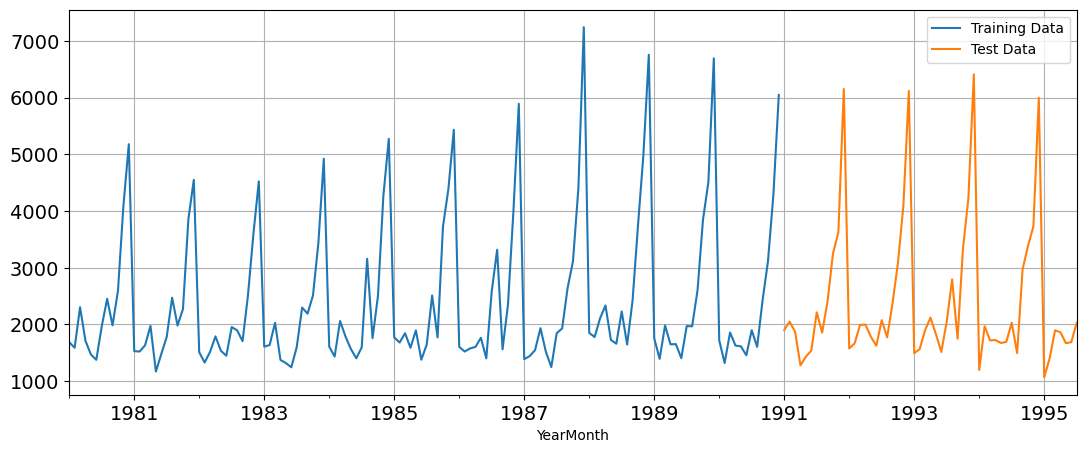

In [36]:
# Plot
train['Sales'].plot(figsize=(13,5), fontsize=14)
test['Sales'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

* The blue curve is the behaviour of a training dataset, and the orange curve is the behaviour of a test dataset.

### <span style='color:Blue'> 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.</span>

- Model 1:Linear Regression 
- Model 2: Naive Approach
- Model 3: Simple Average
- Model 4: Moving Average(MA)
- Model 5: Simple Exponential Smoothing
- Model 6: Double Exponential Smoothing (Holt's Model)
- Model 7: Triple Exponential Smoothing (Holt - Winter's Model)  

### Model 1: Linear Regression
For this particular linear regression, we are going to regress the 'Sales' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [37]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]

print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


* We see that we have successfully generated the numerical time instance order for both the training and test sets. Now we will add these values to the training and test sets.

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [40]:
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sales'].values)

LinearRegression()

In [41]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sales  Year  Month  time
YearMonth                           
1980-01-01   1686  1980      1     1
1980-02-01   1591  1980      2     2
1980-03-01   2304  1980      3     3
1980-04-01   1712  1980      4     4
1980-05-01   1471  1980      5     5 

Last few rows of Training Data 
             Sales  Year  Month  time
YearMonth                           
1990-08-01   1605  1990      8   128
1990-09-01   2424  1990      9   129
1990-10-01   3116  1990     10   130
1990-11-01   4286  1990     11   131
1990-12-01   6047  1990     12   132 

First few rows of Test Data 
             Sales  Year  Month  time
YearMonth                           
1991-01-01   1902  1991      1    43
1991-02-01   2049  1991      2    44
1991-03-01   1874  1991      3    45
1991-04-01   1279  1991      4    46
1991-05-01   1432  1991      5    47 

Last few rows of Test Data 
             Sales  Year  Month  time
YearMonth                           
1995-03-01   1897

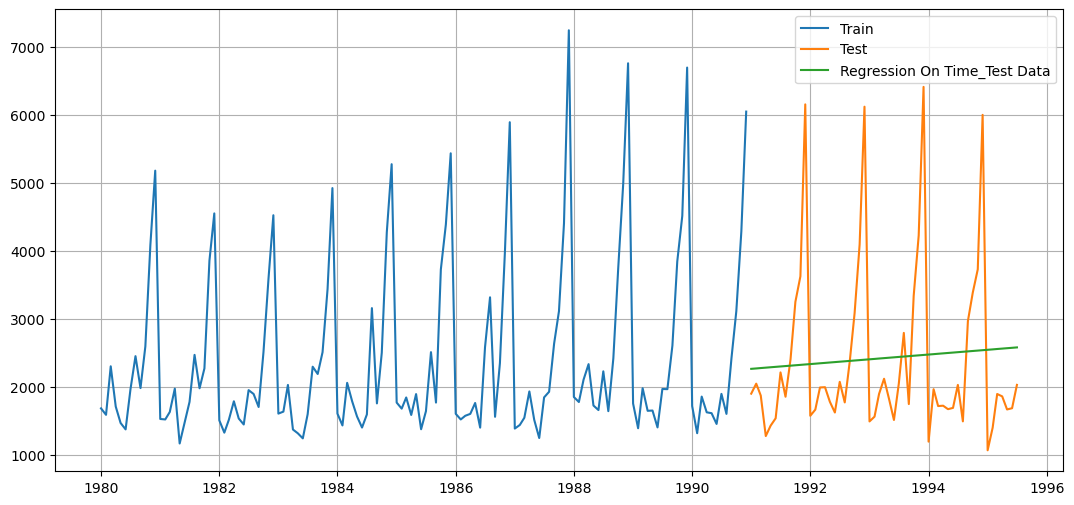

In [42]:
test_predictions_model1            = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

* The green line indicates the predictions made by the model,while the orange values are the actual test values. It is clear that the predicted values are very far off from the actual values.

### Model Evaluation

In [43]:
from sklearn import metrics #Defining the accuracy metrics.

In [44]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Sales'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1275.867


In [45]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE
RegressionOnTime  1275.867052

### Model 2: Naive Approach $\hat{y}_{t+1} = y_t$
For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [46]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [47]:
NaiveModel_test['naive'] = np.asarray(train['Sales'])[len(np.asarray(train['Sales']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

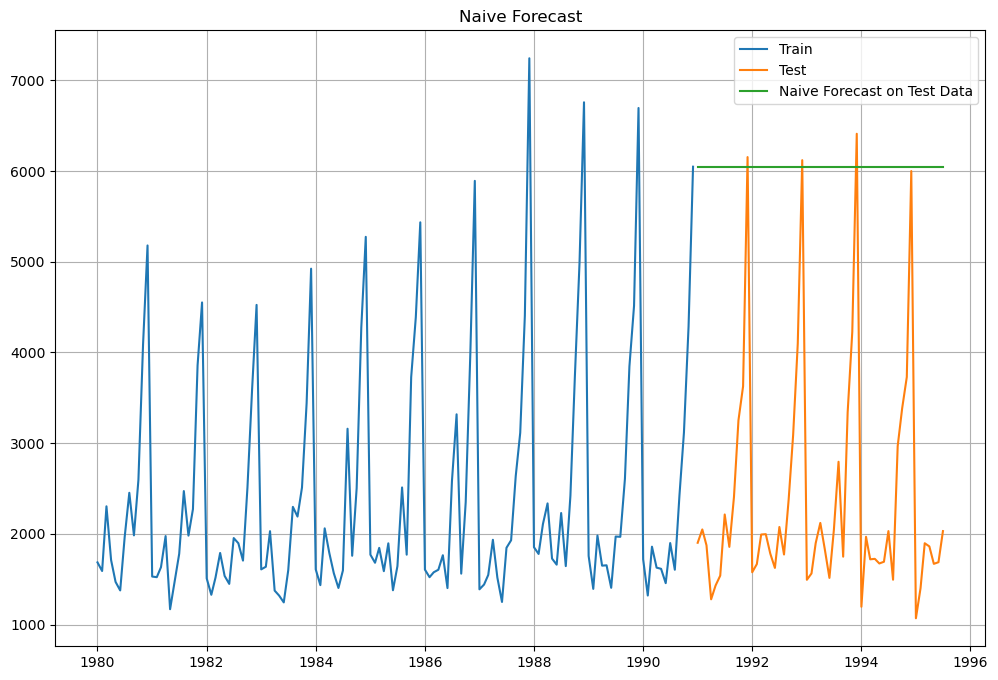

In [48]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

* The green line indicates the predictions made by the model, while the orange values are the actual test values. It is clear the predicted values are very far off from the actual values

### Model Evaluation

In [49]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Sales'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


In [50]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
RegressionOnTime  1275.867052
NaiveModel        3864.279352

### Method 3: Simple Average
For this particular simple average method, we will forecast by using the average of the training values.

In [51]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [52]:
SimpleAverage_test['mean_forecast'] = train['Sales'].mean()
SimpleAverage_test.head()

Sales  Year  Month  mean_forecast
YearMonth                                    
1991-01-01   1902  1991      1    2403.780303
1991-02-01   2049  1991      2    2403.780303
1991-03-01   1874  1991      3    2403.780303
1991-04-01   1279  1991      4    2403.780303
1991-05-01   1432  1991      5    2403.780303

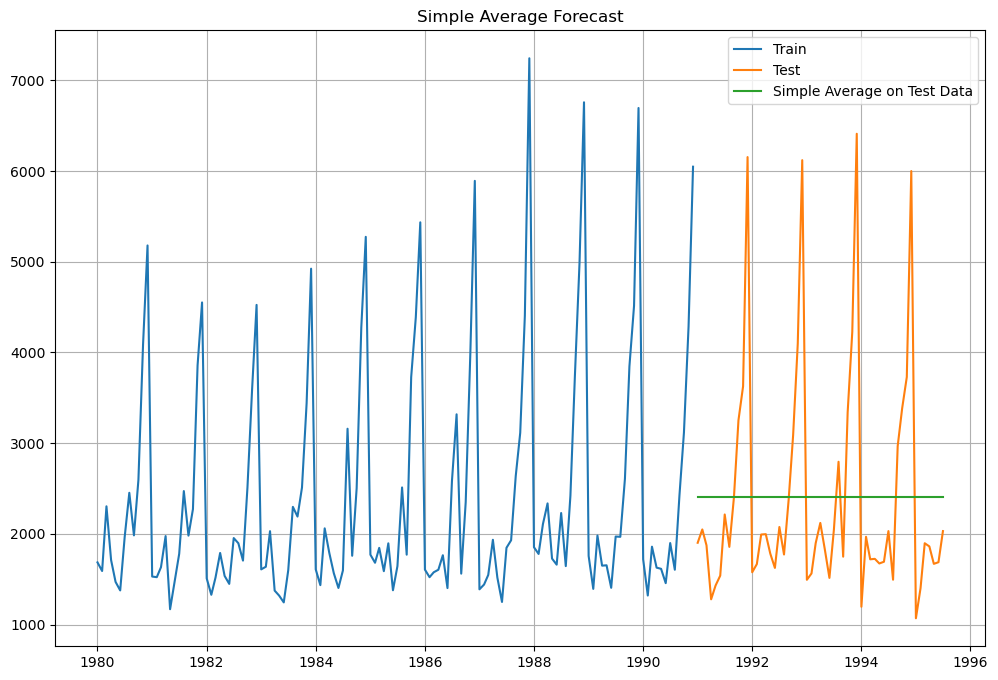

In [53]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sales'], label='Train')
plt.plot(SimpleAverage_test['Sales'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

* The green line indicates the predictions made by the model, while the orange values are the actual test values. It is clear the predicted values are very far off from the actual values.

In [54]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Sales'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [55]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
RegressionOnTime    1275.867052
NaiveModel          3864.279352
SimpleAverageModel  1275.081804

### Method 4: Moving Average(MA)
For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.
For Moving Average, we are going to average over the entire data.

In [56]:
MovingAverage = Sparkling_df.copy()
MovingAverage.head()

Sales  Year  Month
YearMonth                     
1980-01-01   1686  1980      1
1980-02-01   1591  1980      2
1980-03-01   2304  1980      3
1980-04-01   1712  1980      4
1980-05-01   1471  1980      5

In [57]:
MovingAverage['Trailing_2'] = MovingAverage['Sales'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sales'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sales'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sales'].rolling(9).mean()

MovingAverage.head()

Sales  Year  Month  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                                     
1980-01-01   1686  1980      1         NaN         NaN         NaN         NaN
1980-02-01   1591  1980      2      1638.5         NaN         NaN         NaN
1980-03-01   2304  1980      3      1947.5         NaN         NaN         NaN
1980-04-01   1712  1980      4      2008.0     1823.25         NaN         NaN
1980-05-01   1471  1980      5      1591.5     1769.50         NaN         NaN

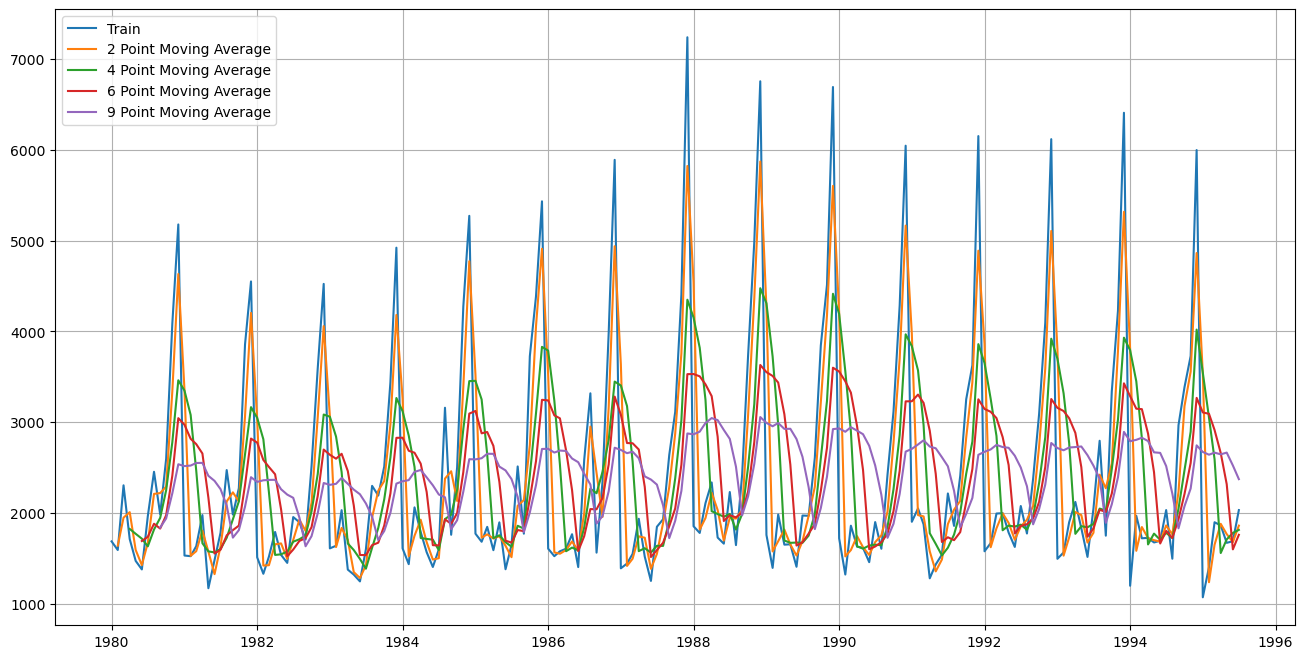

In [58]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sales'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [59]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index < '1991-01-01']
trailing_MovingAverage_test=MovingAverage[MovingAverage.index >= '1991-01-01']

In [60]:
print(trailing_MovingAverage_test.shape)
print(trailing_MovingAverage_train.shape)

(55, 7)
(132, 7)


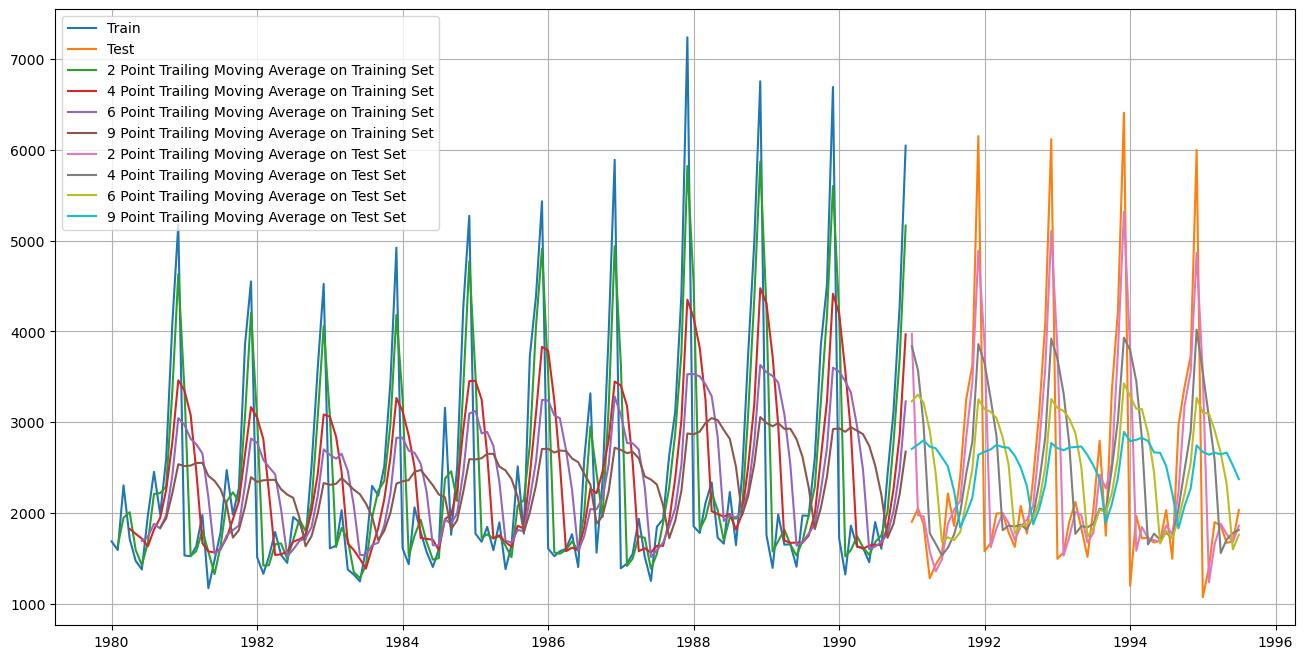

In [61]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sales'], label='Train')
plt.plot(trailing_MovingAverage_test['Sales'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

* We have made multiple moving average models with rolling windows varying from 2 to 9

### Model Evaluation
* Done only on the test data.

In [62]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278 


In [63]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
RegressionOnTime             1275.867052
NaiveModel                   3864.279352
SimpleAverageModel           1275.081804
2pointTrailingMovingAverage   813.400684
4pointTrailingMovingAverage  1156.589694
6pointTrailingMovingAverage  1283.927428
9pointTrailingMovingAverage  1346.278315

### <span style='color: Indigo'>Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.</span>

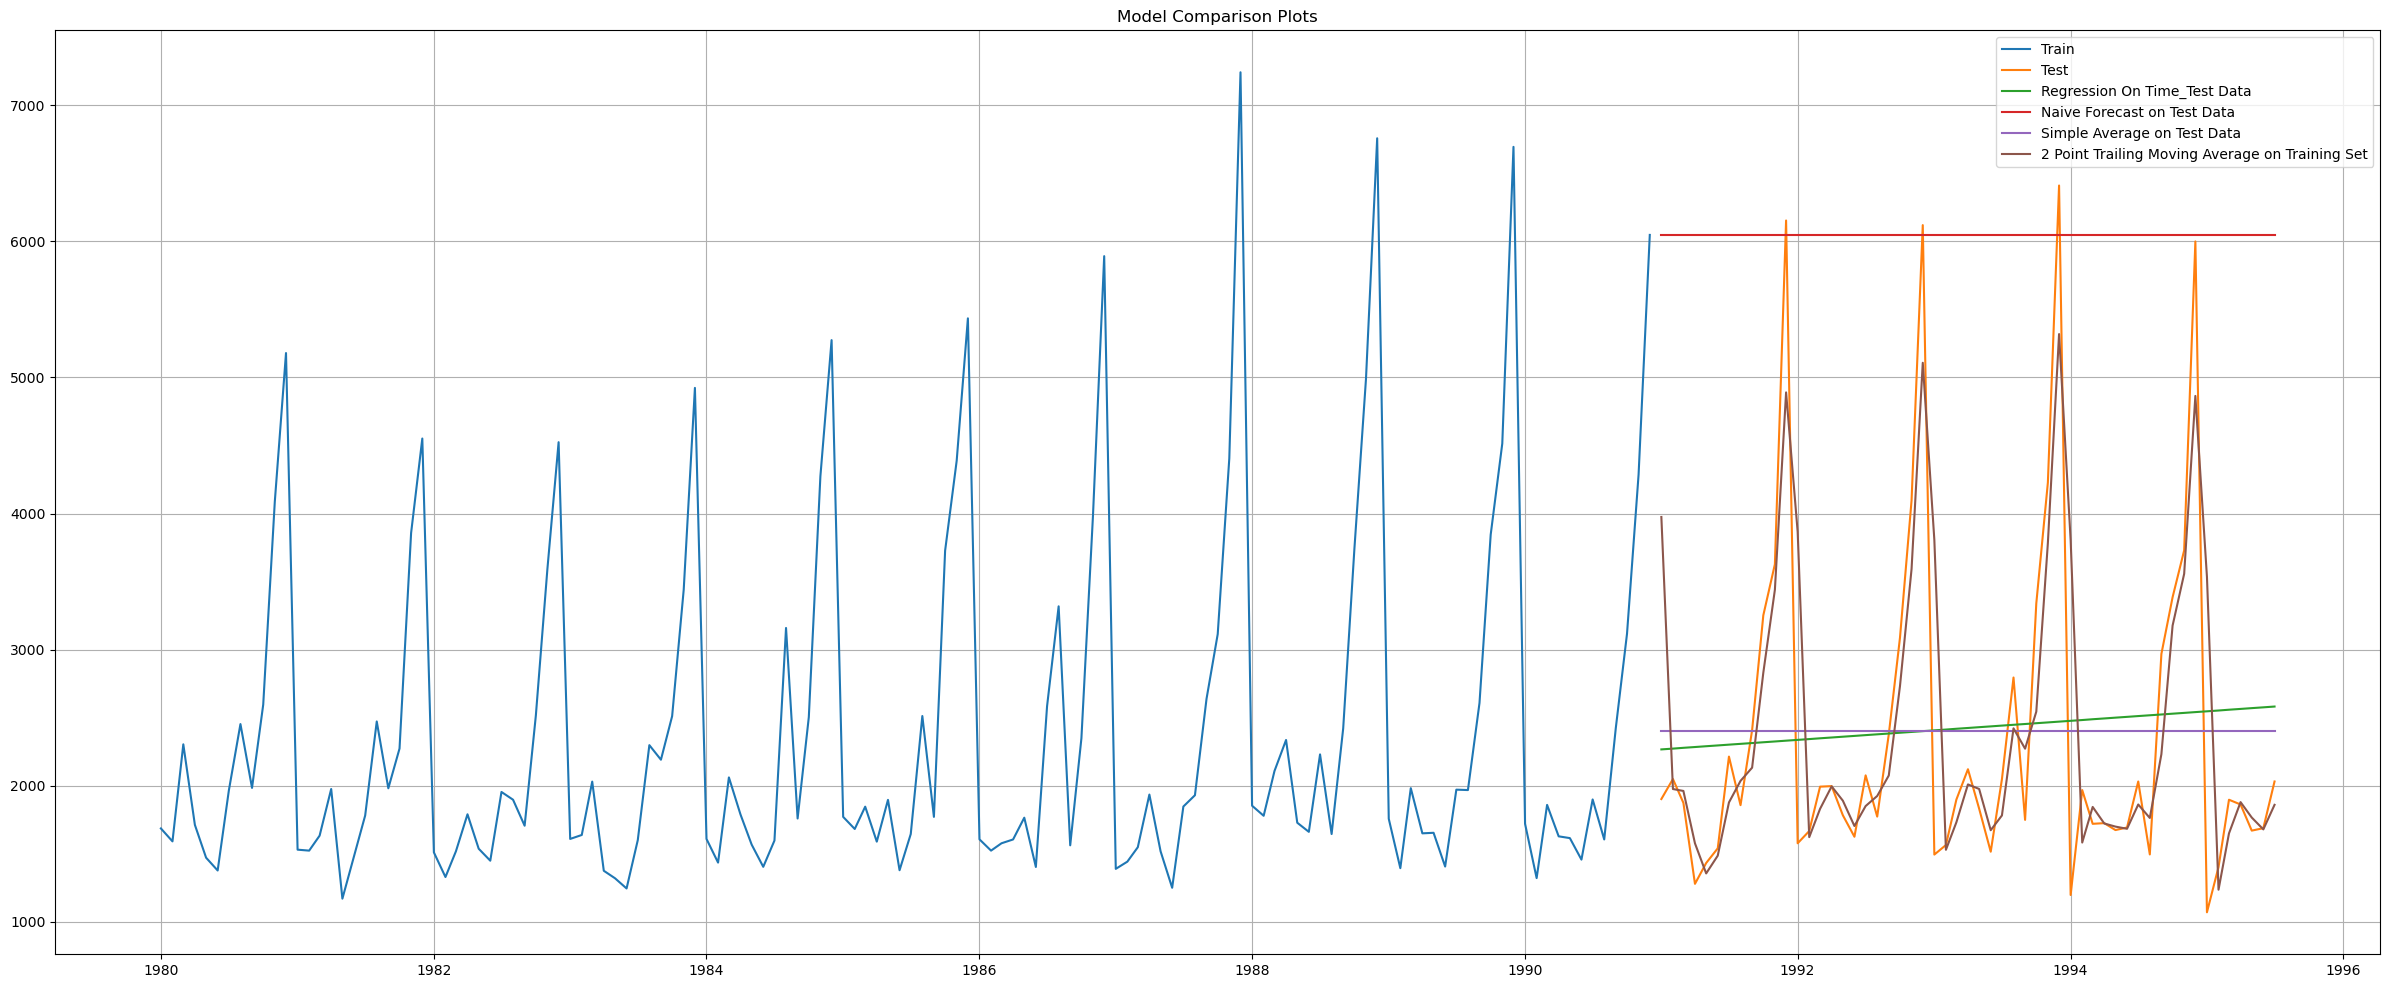

In [64]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

* In model comparison plots, 'Naive Forecast on Test Data' is very far, and 'Regression on Time_Test Data' and 'Simple Average on Test Data' are near compare to all plots.

### Method 5: Simple Exponential Smoothing

In [65]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [66]:
SES_train = train.copy()
SES_test = test.copy()

In [67]:
model_SES = SimpleExpSmoothing(SES_train['Sales'])

C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [68]:
model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [69]:
model_SES_autofit.params

{'smoothing_level': 0.049607360581862936,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.535750008871,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [70]:
resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [71]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Sales  Year  Month      predict
YearMonth                                  
1991-01-01   1902  1991      1  2724.932624
1991-02-01   2049  1991      2  2724.932624
1991-03-01   1874  1991      3  2724.932624
1991-04-01   1279  1991      4  2724.932624
1991-05-01   1432  1991      5  2724.932624

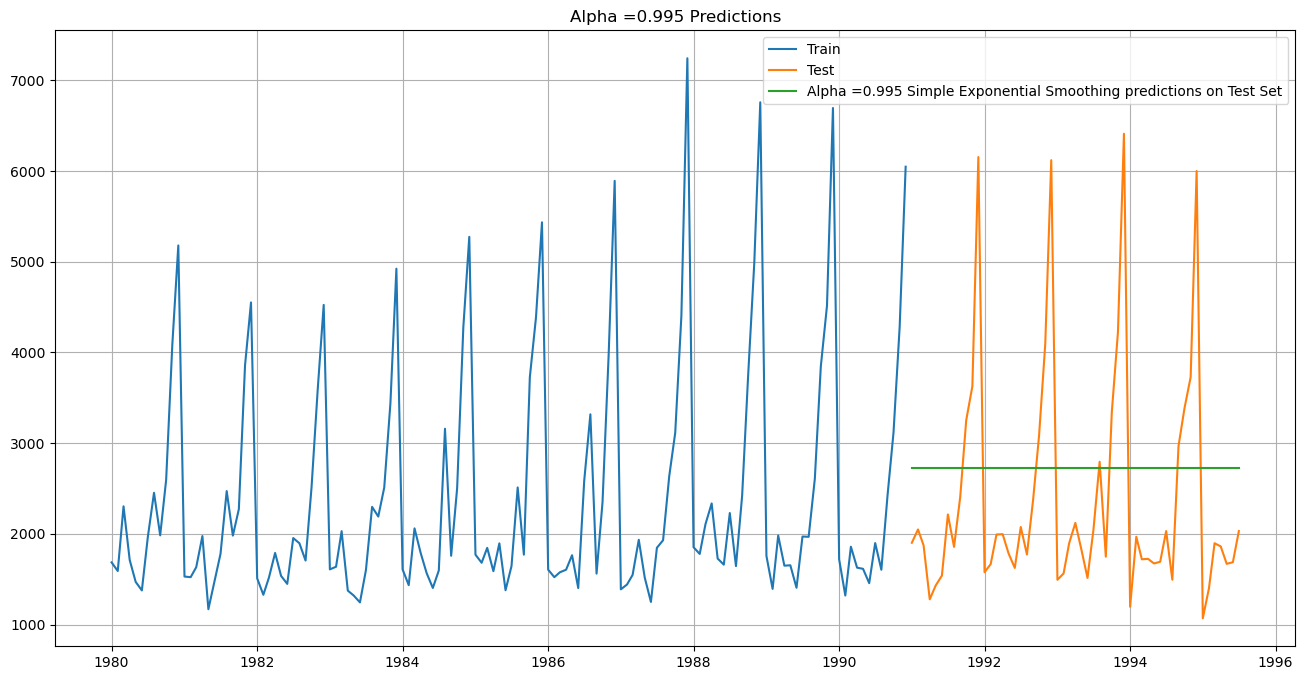

In [72]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sales'], label='Train')
plt.plot(SES_test['Sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

* The green line indicates the predictions made by the model, while the orange values are the actual test values. It is clear the predicted values are very far off from the actual values for 'Alpha =0.995 Simple Exponential Smoothing predictions on Test Set'.

### Model Evaluation for  𝛼  = 0.995 : Simple Exponential Smoothing

In [73]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sales'],SES_test['predict'],squared=False)
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1316.035


In [74]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.995,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
RegressionOnTime                        1275.867052
NaiveModel                              3864.279352
SimpleAverageModel                      1275.081804
2pointTrailingMovingAverage              813.400684
4pointTrailingMovingAverage             1156.589694
6pointTrailingMovingAverage             1283.927428
9pointTrailingMovingAverage             1346.278315
Alpha=0.995,SimpleExponentialSmoothing  1316.035487

* Setting different alpha values.
* Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.
* We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [75]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [76]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Sales  Year  Month      predict
YearMonth                                  
1991-01-01   1902  1991      1  2724.932624
1991-02-01   2049  1991      2  2724.932624
1991-03-01   1874  1991      3  2724.932624
1991-04-01   1279  1991      4  2724.932624
1991-05-01   1432  1991      5  2724.932624

In [77]:
# Initialize an empty list to store results
results_list = []

for i in np.arange(0.1, 1, 0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i, optimized=False, use_brute=True)
    SES_train['predict', i] = model_SES_alpha_i.fittedvalues
    SES_test['predict', i] = model_SES_alpha_i.forecast(steps=len(SES_test))
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sales'], SES_train['predict', i], squared=False)
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sales'], SES_test['predict', i], squared=False)
    
    # Append results to the list
    results_list.append({'Alpha Values': i, 'Train RMSE': rmse_model5_train_i, 'Test RMSE': rmse_model5_test_i})

# Convert the list of dictionaries into a DataFrame
resultsDf_temp = pd.DataFrame(results_list)
resultsDf_temp

Alpha Values   Train RMSE    Test RMSE
0           0.1  1333.873836  1375.393398
1           0.2  1356.042987  1595.206839
2           0.3  1359.511747  1935.507132
3           0.4  1352.588879  2311.919615
4           0.5  1344.004369  2666.351413
5           0.6  1338.805381  2979.204388
6           0.7  1338.844308  3249.944092
7           0.8  1344.462091  3483.801006
8           0.9  1355.723518  3686.794285

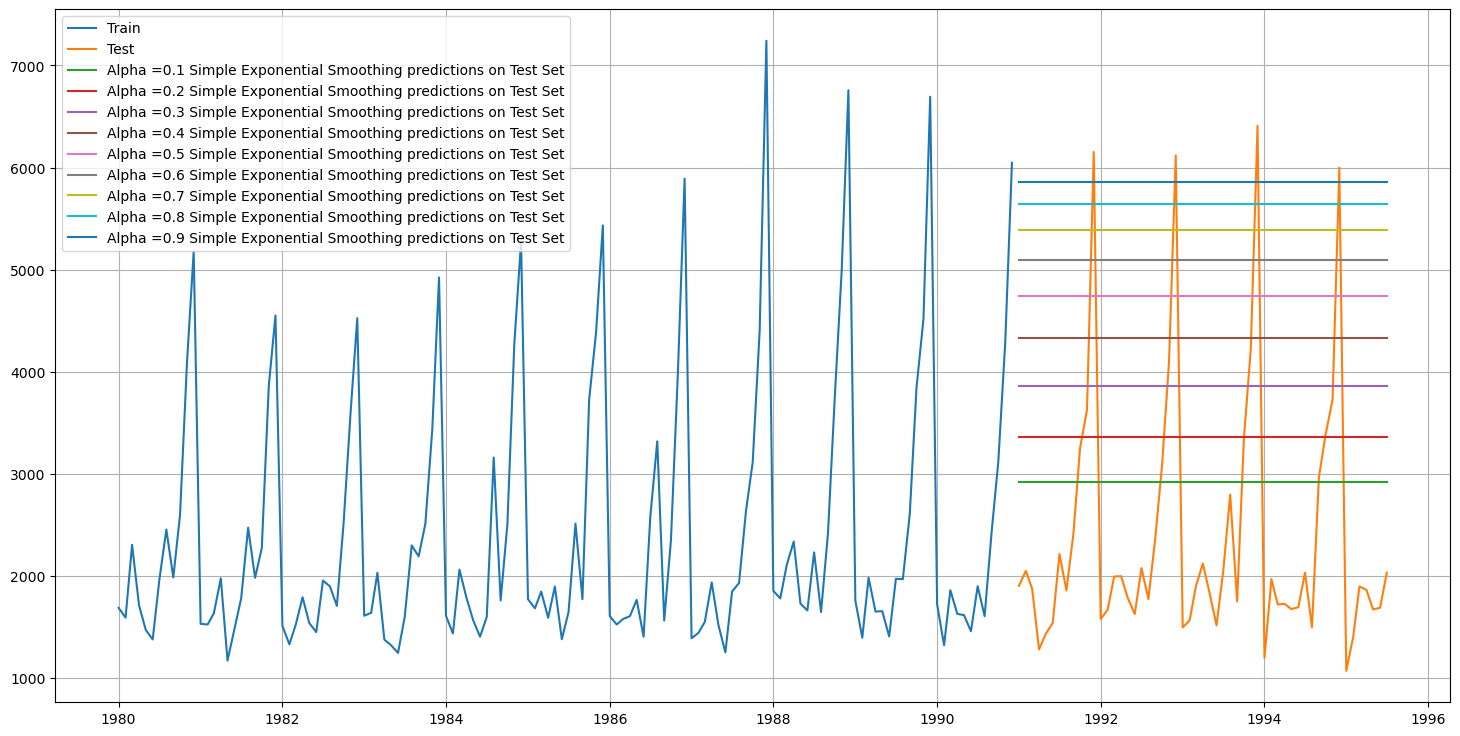

In [78]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sales'], label='Train')
plt.plot(SES_test['Sales'], label='Test')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.2], label='Alpha =0.2 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.30000000000000004], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.5], label='Alpha =0.5 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.6], label='Alpha =0.6 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.7000000000000001], label='Alpha =0.7 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.8], label='Alpha =0.8 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.9], label='Alpha =0.9 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

* The green line indicates the predictions made by the model, while the orange values are the actual test values. Multiple right lines show the alpha value of 0.1 to 0.9 for simple exponential smoothing predictions on the test set.

In [79]:
resultsDf_temp.sort_values(by=['Test RMSE'],ascending=True)

## Test Data
resultsDf_5 = pd.DataFrame({'Test RMSE': [resultsDf_temp.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
RegressionOnTime                        1275.867052
NaiveModel                              3864.279352
SimpleAverageModel                      1275.081804
2pointTrailingMovingAverage              813.400684
4pointTrailingMovingAverage             1156.589694
6pointTrailingMovingAverage             1283.927428
9pointTrailingMovingAverage             1346.278315
Alpha=0.995,SimpleExponentialSmoothing  1316.035487
Alpha=0.1,SimpleExponentialSmoothing    1375.393398

### Method 6: Double Exponential Smoothing (Holt's Model)
* Two parameters  𝛼 and  𝛽 are estimated in this model. Level and Trend are accounted for in this model.

In [80]:
DES_train = train.copy()
DES_test = test.copy()

In [81]:
model_DES = Holt(DES_train['Sales'])

C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [82]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
model_DES_autofit = model_DES.fit(optimized=True)

model_DES_autofit.params

C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


{'smoothing_level': 0.6885714285714285,
 'smoothing_trend': 9.999999999999999e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': -95.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [83]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

Sales  Year  Month      predict
YearMonth                                  
1991-01-01   1902  1991      1  5221.278699
1991-02-01   2049  1991      2  5127.886554
1991-03-01   1874  1991      3  5034.494409
1991-04-01   1279  1991      4  4941.102264
1991-05-01   1432  1991      5  4847.710119

In [84]:
del resultsDf_temp
## First we will define an empty dataframe to store our values from the loop

resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [85]:
## Test Data

rmse_model_temp = metrics.mean_squared_error(SES_test['Sales'],SES_test['predict'],squared=False)
print("For Alpha =0.6477, Beta = 0.0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model_temp))

For Alpha =0.6477, Beta = 0.0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 1316.035


In [86]:
# Initialize an empty list to store results
results_list = []

for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(DES_test))
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sales'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sales'],DES_test['predict',i,j],squared=False)
        
        # Append results to the list
        results_list.append({'Alpha Values':i,'Beta Values':j,'Train RMSE': rmse_model6_train, 'Test RMSE': rmse_model6_test})

# Convert the list of dictionaries into a DataFrame
resultsDf_6 = pd.DataFrame(results_list)
resultsDf_6

Alpha Values  Beta Values   Train RMSE     Test RMSE
0            0.1          0.1  1382.520870   1778.564670
1            0.1          0.2  1413.598835   2599.439986
2            0.1          0.3  1445.762015   4293.084674
3            0.1          0.4  1480.897776   6039.537339
4            0.1          0.5  1521.108657   7390.522201
..           ...          ...          ...           ...
95           1.0          0.6  1753.402326  49327.087977
96           1.0          0.7  1825.187155  52655.765663
97           1.0          0.8  1902.013709  55442.273880
98           1.0          0.9  1985.368445  57823.177011
99           1.0          1.0  2077.672157  59877.076519

[100 rows x 4 columns]

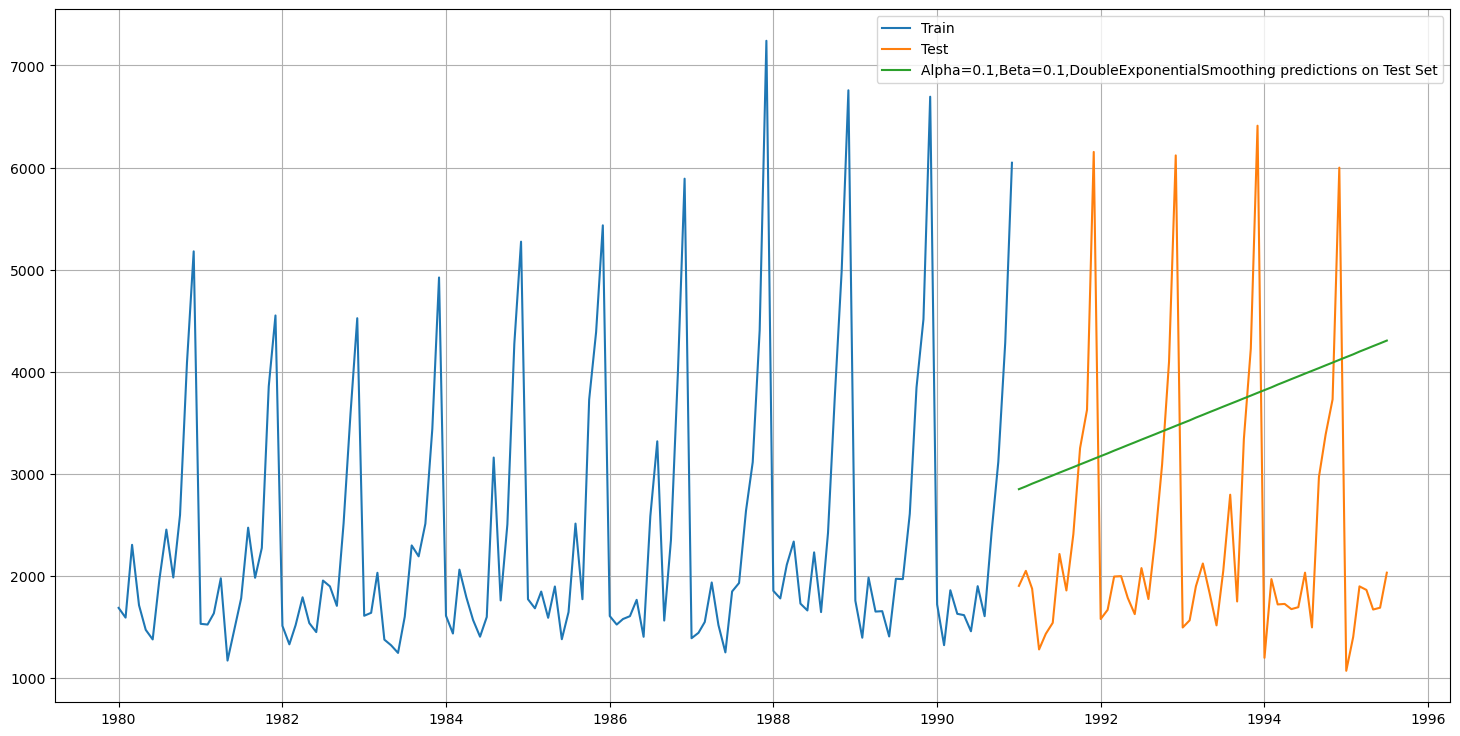

In [87]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sales'], label='Train')
plt.plot(DES_test['Sales'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

* The green line indicates the predictions made by the model, while the orange values are the actual test values. It is clear the predicted values are very far off from the actual values.

### Model Evaluation

In [88]:
resultsDf_6.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values   Train RMSE    Test RMSE
0            0.1          0.1  1382.520870  1778.564670
1            0.1          0.2  1413.598835  2599.439986
10           0.2          0.1  1418.041591  3611.763322
2            0.1          0.3  1445.762015  4293.084674
20           0.3          0.1  1431.169601  5908.185554

In [89]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE
RegressionOnTime                                    1275.867052
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.995,SimpleExponentialSmoothing              1316.035487
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1778.564670

### Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

In [90]:
TES_train = train.copy()
TES_test = test.copy()

In [91]:
model_TES_ta_sa = ExponentialSmoothing(TES_train['Sales'],trend='additive',seasonal='additive')
model_TES_ta_sm = ExponentialSmoothing(TES_train['Sales'],trend='additive',seasonal='multiplicative')
model_TES_tm_sm = ExponentialSmoothing(TES_train['Sales'],trend='multiplicative',seasonal='multiplicative')
model_TES_tm_sa = ExponentialSmoothing(TES_train['Sales'],trend='multiplicative',seasonal='additive')

C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [92]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [93]:
model_TES_autofit_ta_sa = model_TES_ta_sa.fit(optimized=True)
model_TES_autofit_ta_sm = model_TES_ta_sm.fit(optimized=True)
model_TES_autofit_tm_sm = model_TES_tm_sm.fit(optimized=True)
model_TES_autofit_tm_sa = model_TES_tm_sa.fit(optimized=True)

In [94]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [95]:
model_TES_autofit_ta_sa.params

{'smoothing_level': 0.11127227248079453,
 'smoothing_trend': 0.012360804305088534,
 'smoothing_seasonal': 0.46071766688111543,
 'damping_trend': nan,
 'initial_level': 2356.577980956387,
 'initial_trend': -0.10243675533021725,
 'initial_seasons': array([-636.23319334, -722.9832009 , -398.64410813, -473.43045416,
        -808.42473284, -815.34991402, -384.23065038,   72.99484403,
        -237.44226045,  272.32608272, 1541.37737052, 2590.07692296]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [96]:
model_TES_autofit_ta_sm.params

{'smoothing_level': 0.11133818361298699,
 'smoothing_trend': 0.049505131019509915,
 'smoothing_seasonal': 0.3620795793580111,
 'damping_trend': nan,
 'initial_level': 2356.4967888704355,
 'initial_trend': -10.187944726007238,
 'initial_seasons': array([0.71296382, 0.68242226, 0.90755008, 0.80515228, 0.65597218,
        0.65414505, 0.88617935, 1.13345121, 0.92046306, 1.21337874,
        1.87340336, 2.37811768]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [97]:
model_TES_autofit_tm_sm.params

{'smoothing_level': 0.11106668752955826,
 'smoothing_trend': 0.04936072355729082,
 'smoothing_seasonal': 0.3621821387810734,
 'damping_trend': nan,
 'initial_level': 2360.4089797373545,
 'initial_trend': 0.9992288111047797,
 'initial_seasons': array([0.71936124, 0.6984697 , 0.90024844, 0.80991063, 0.66820986,
        0.66898271, 0.87875613, 1.11648842, 0.90067181, 1.17297733,
        1.82687893, 2.27815792]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [98]:
model_TES_autofit_tm_sa.params

{'smoothing_level': 0.11547695423872925,
 'smoothing_trend': 0.01333948465001367,
 'smoothing_seasonal': 0.45651344911741876,
 'damping_trend': nan,
 'initial_level': 2356.7858848588307,
 'initial_trend': 0.9993277724877484,
 'initial_seasons': array([-689.98020882, -763.37387324, -296.37077918, -501.80365863,
        -860.47791971, -865.97665429, -384.33505634,  141.07945892,
        -307.05100916,  257.89484861, 1675.59313811, 2693.73018421]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [99]:
TES_test['predict_ta_sa'] = model_TES_autofit_ta_sa.forecast(steps=len(test))
TES_test.head()

Sales  Year  Month  predict_ta_sa
YearMonth                                    
1991-01-01   1902  1991      1    1490.402890
1991-02-01   2049  1991      2    1204.525152
1991-03-01   1874  1991      3    1688.734182
1991-04-01   1279  1991      4    1551.226125
1991-05-01   1432  1991      5    1461.197883

In [100]:
TES_test['predict_ta_sm'] = model_TES_autofit_ta_sm.forecast(steps=len(test))
TES_test.head()

Sales  Year  Month  predict_ta_sa  predict_ta_sm
YearMonth                                                   
1991-01-01   1902  1991      1    1490.402890    1587.497468
1991-02-01   2049  1991      2    1204.525152    1356.394925
1991-03-01   1874  1991      3    1688.734182    1762.929755
1991-04-01   1279  1991      4    1551.226125    1656.165933
1991-05-01   1432  1991      5    1461.197883    1542.002730

In [101]:
TES_test['predict_tm_sm'] = model_TES_autofit_tm_sm.forecast(steps=len(test))
TES_test.head()

Sales  Year  Month  predict_ta_sa  predict_ta_sm  predict_tm_sm
YearMonth                                                                  
1991-01-01   1902  1991      1    1490.402890    1587.497468    1591.299973
1991-02-01   2049  1991      2    1204.525152    1356.394925    1360.408886
1991-03-01   1874  1991      3    1688.734182    1762.929755    1767.949510
1991-04-01   1279  1991      4    1551.226125    1656.165933    1661.619432
1991-05-01   1432  1991      5    1461.197883    1542.002730    1547.414170

In [102]:
TES_test['predict_tm_sa'] = model_TES_autofit_tm_sa.forecast(steps=len(test))
TES_test.head()

Sales  Year  Month  predict_ta_sa  predict_ta_sm  predict_tm_sm  \
YearMonth                                                                     
1991-01-01   1902  1991      1    1490.402890    1587.497468    1591.299973   
1991-02-01   2049  1991      2    1204.525152    1356.394925    1360.408886   
1991-03-01   1874  1991      3    1688.734182    1762.929755    1767.949510   
1991-04-01   1279  1991      4    1551.226125    1656.165933    1661.619432   
1991-05-01   1432  1991      5    1461.197883    1542.002730    1547.414170   

            predict_tm_sa  
YearMonth                  
1991-01-01    1483.304864  
1991-02-01    1199.007966  
1991-03-01    1682.755193  
1991-04-01    1546.660734  
1991-05-01    1456.387757

In [103]:
## Test Data

rmse_model_temp_ta_sa = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sa'],squared=False)
print("For Alpha =0.08621, Beta = 1.3722, Gamma = 0.4763 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_ta_sa))

## Test Data

rmse_model_temp_ta_sm = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sm'],squared=False)
print("For Alpha =0.1542, Beta = 5.3100, Gamma = 0.3713 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_ta_sm))

## Test Data

rmse_model_temp_tm_sm = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sm'],squared=False)
print("For Alpha =0.1531, Beta = 1.3401, Gamma = 0.3691 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_tm_sm))

## Test Data

rmse_model_temp_tm_sa = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sa'],squared=False)
print("For Alpha =0.0831, Beta = 7.8624, Gamma = 0.4910 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_tm_sa))

For Alpha =0.08621, Beta = 1.3722, Gamma = 0.4763 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is 378.951
For Alpha =0.1542, Beta = 5.3100, Gamma = 0.3713 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 404.287
For Alpha =0.1531, Beta = 1.3401, Gamma = 0.3691 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 380.398
For Alpha =0.0831, Beta = 7.8624, Gamma = 0.4910 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is 381.191


In [104]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse_model_temp}
                           ,index=['Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
RegressionOnTime                                    1275.867052
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.995,SimpleExponentialSmoothing              1316.035487
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1778.564670
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  1316.035487

In [105]:
TES_train = train.copy()
TES_test = test.copy()
del resultsDf_7_2

## First we will define an empty dataframe to store our values from the loop

resultsDf_7_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': [],
                             'Method' : []})
resultsDf_7_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE, Method]
Index: []

In [106]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_ta_sa',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_ta_sa',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_ta_sa',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sa',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = resultsDf_7_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'ta_sa'}
                                                 , ignore_index=True)

In [107]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sm.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_ta_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_ta_sm',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_ta_sm',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sm',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = resultsDf_7_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'ta_sm'}
                                                 , ignore_index=True)

In [108]:
for i in np.arange(0.1,1.0,0.1):
    for j in np.arange(0.1,1.0,0.1):
        for k in np.arange(0.1,1.0,0.1):
            model_TES_alpha_i_j_k = model_TES_tm_sm.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_tm_sm',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sm',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = resultsDf_7_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'tm_sm'}
                                                 , ignore_index=True)

In [109]:
for i in np.arange(0.1,1.0,0.1):
    for j in np.arange(0.1,1.0,0.1):
        for k in np.arange(0.1,1.0,0.1):
            model_TES_alpha_i_j_k = model_TES_tm_sm.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_tm_sm',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sm',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = resultsDf_7_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'tm_sm'}
                                                 , ignore_index=True)

In [110]:
TES_test.head()

Sales  Year  Month  (predict_ta_sa, 0.1, 0.1, 0.1)  \
YearMonth                                                        
1991-01-01   1902  1991      1                     1671.894991   
1991-02-01   2049  1991      2                     1535.938082   
1991-03-01   1874  1991      3                     1882.992874   
1991-04-01   1279  1991      4                     1798.243923   
1991-05-01   1432  1991      5                     1576.572747   

            (predict_ta_sa, 0.1, 0.1, 0.2)  \
YearMonth                                    
1991-01-01                     1540.529588   
1991-02-01                     1354.094081   
1991-03-01                     1728.658127   
1991-04-01                     1638.281580   
1991-05-01                     1470.697707   

            (predict_ta_sa, 0.1, 0.1, 0.30000000000000004)  \
YearMonth                                                    
1991-01-01                                     1472.827405   
1991-02-01                                     1236.723426   
1991-03-01                                     1644.294990   
1991-04-01                                     1535.922824   
1991-05-01                                     1394.544409   

            (predict_ta_sa, 0.1, 0.1, 0.4)  (predict_ta_sa, 0.1, 0.1, 0.5)  \
YearMonth                                                                    
1991-01-01                     1444.947521                     1440.100315   
1991-02-01                     1163.127303                     1118.381068   
1991-03-01                     1605.772780                     1593.658780   
1991-04-01                     1469.062420                     1424.230588   
1991-05-01                     1347.223962                     1324.218679   

            (predict_ta_sa, 0.1, 0.1, 0.6)  \
YearMonth                                    
1991-01-01                     1446.456719   
1991-02-01                     1091.681321   
1991-03-01                     1593.602194   
1991-04-01                     1393.229741   
1991-05-01                     1318.006765   

            (predict_ta_sa, 0.1, 0.1, 0.7000000000000001)  ...  \
YearMonth                                                  ...   
1991-01-01                                    1456.102126  ...   
1991-02-01                                    1075.381082  ...   
1991-03-01                                    1595.700721  ...   
1991-04-01                                    1370.975056  ...   
1991-05-01                                    1319.843928  ...   

            (predict_tm_sm, 0.9, 0.8, 0.9)  (predict_tm_sm, 0.9, 0.9, 0.1)  \
YearMonth                                                                    
1991-01-01                    1.160678e+05                     1713.018402   
1991-02-01                    7.552627e+08                     1757.192030   
1991-03-01                    1.377491e+12                     2348.097089   
1991-04-01                    8.243293e+14                     2094.997512   
1991-05-01                    3.121327e+17                     1835.487178   

            (predict_tm_sm, 0.9, 0.9, 0.2)  \
YearMonth                                    
1991-01-01                     1644.985177   
1991-02-01                     1627.775592   
1991-03-01                     2443.377635   
1991-04-01                     2053.108500   
1991-05-01                     1870.591269   

            (predict_tm_sm, 0.9, 0.9, 0.30000000000000004)  \
YearMonth                                                    
1991-01-01                                     1779.203953   
1991-02-01                                     1784.678633   
1991-03-01                                     3217.298090   
1991-04-01                                     2748.533957   
1991-05-01                                     2481.455362   

            (predict_tm_sm, 0.9, 0.9, 0.4)  (predict_tm_sm, 0.9, 0.9, 0.5)  \
YearMonth                                                                  

### Model Evaluation

In [111]:
resultsDf_7_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE   Test RMSE Method
1301           0.4          0.1           0.2  384.467709  317.434302  ta_sm
2245           0.4          0.1           0.3  381.106645  326.579641  tm_sm
2974           0.4          0.1           0.3  381.106645  326.579641  tm_sm
1211           0.3          0.2           0.2  388.544148  329.037543  ta_sm
1200           0.3          0.1           0.1  388.220071  337.080969  ta_sm

In [112]:
resultsDf_7_3 = pd.DataFrame({'Test RMSE': [resultsDf_7_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_3])
resultsDf

Test RMSE
RegressionOnTime                                    1275.867052
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.995,SimpleExponentialSmoothing              1316.035487
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1778.564670
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  1316.035487
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302

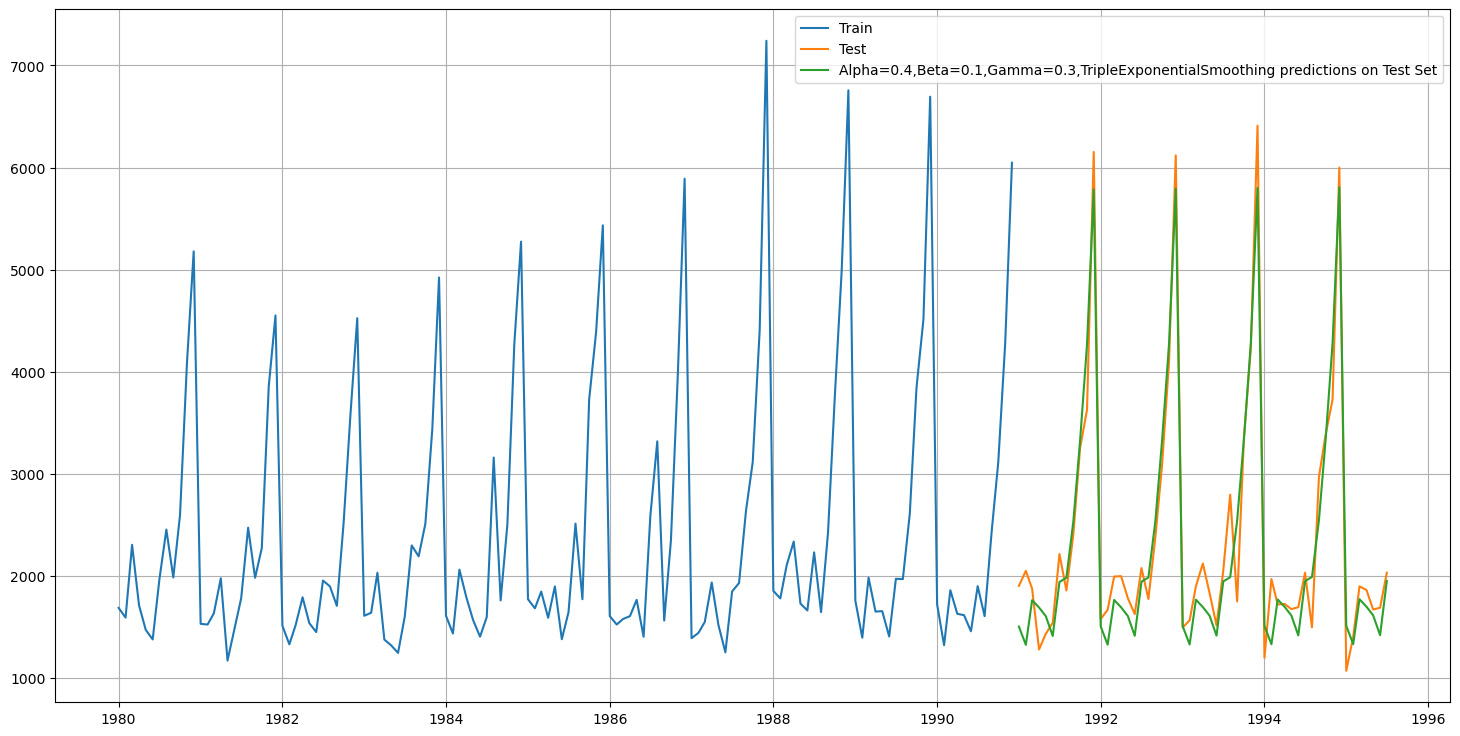

In [113]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sales'], label='Train')
plt.plot(TES_test['Sales'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict_tm_sm', 0.4, 0.1, 0.30000000000000004], 
         label='Alpha=0.4,Beta=0.1,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

* A best alpha, beta, and gamma values are shown by the green colour line in the above plot. The best model had both a multiplicative trends, as well as a seasonality Model.

### <span style='color:Blue'> 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05. </span>

**Check for stationarity of the whole Time Series data.**

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:

H0 : The Time Series has a unit root and is thus non-stationary.
H1 : The Time Series does not have a unit root and is thus stationary.
We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the α value.

We see that at 5% significant level the Time Series is non-stationary.

In [114]:
from statsmodels.tsa.stattools import adfuller

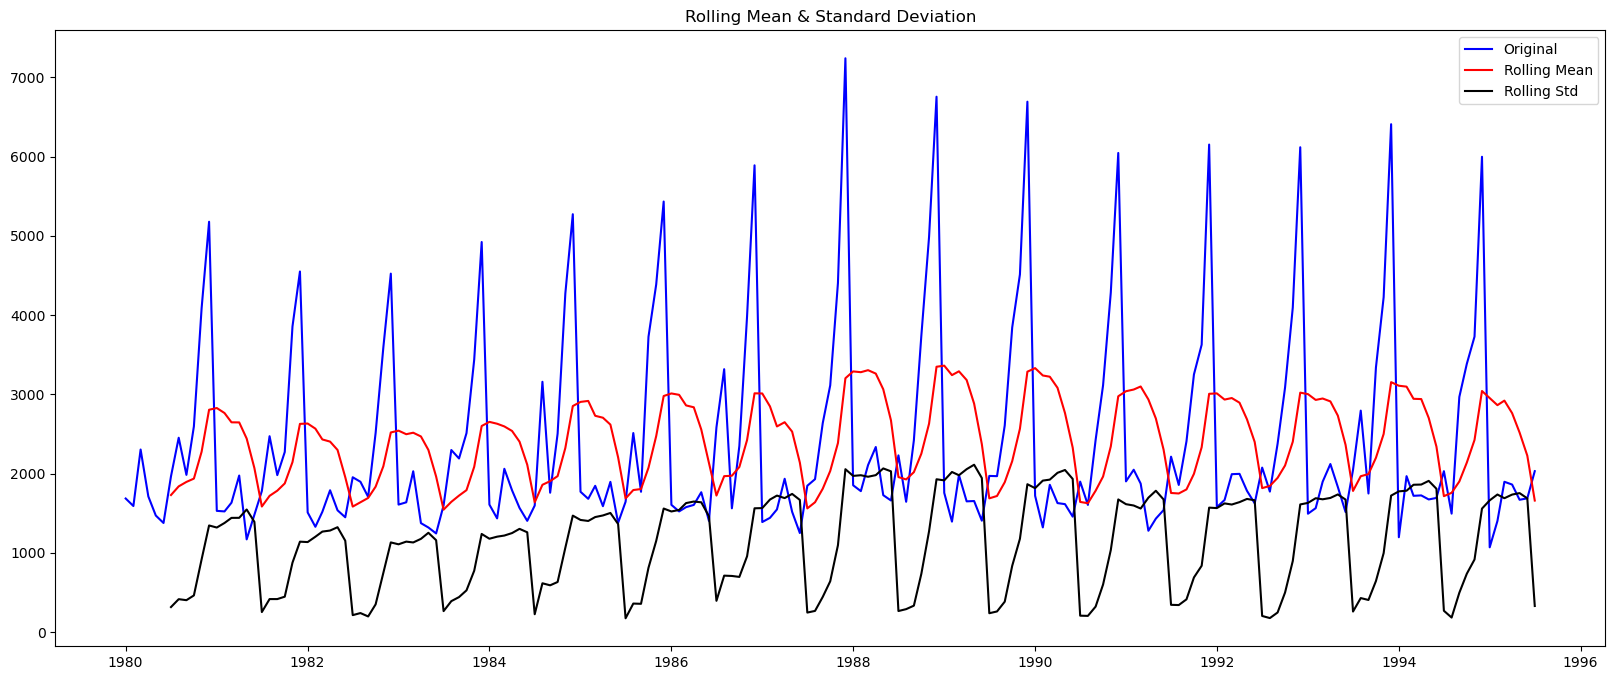

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [115]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')
test_stationarity(Sparkling_df['Sales'])

* We see that at 5% significant level the Time Series is non-stationary.
* Let us take a difference of order 1 and check whether the Time Series is stationary or not.

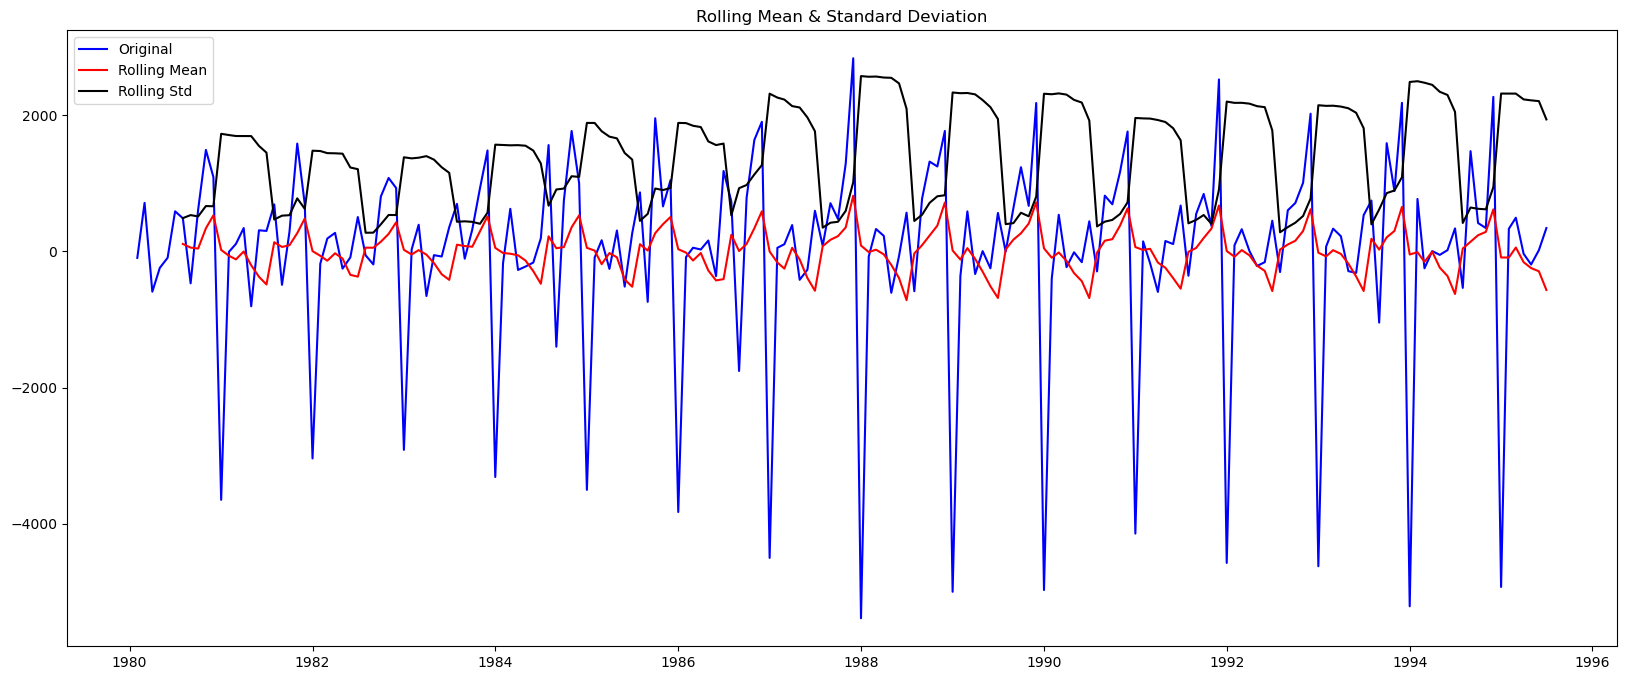

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [116]:
test_stationarity(Sparkling_df['Sales'].diff().dropna())

* We see that at  𝛼 = 0.05 the Time Series is indeed stationary.

### Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [117]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

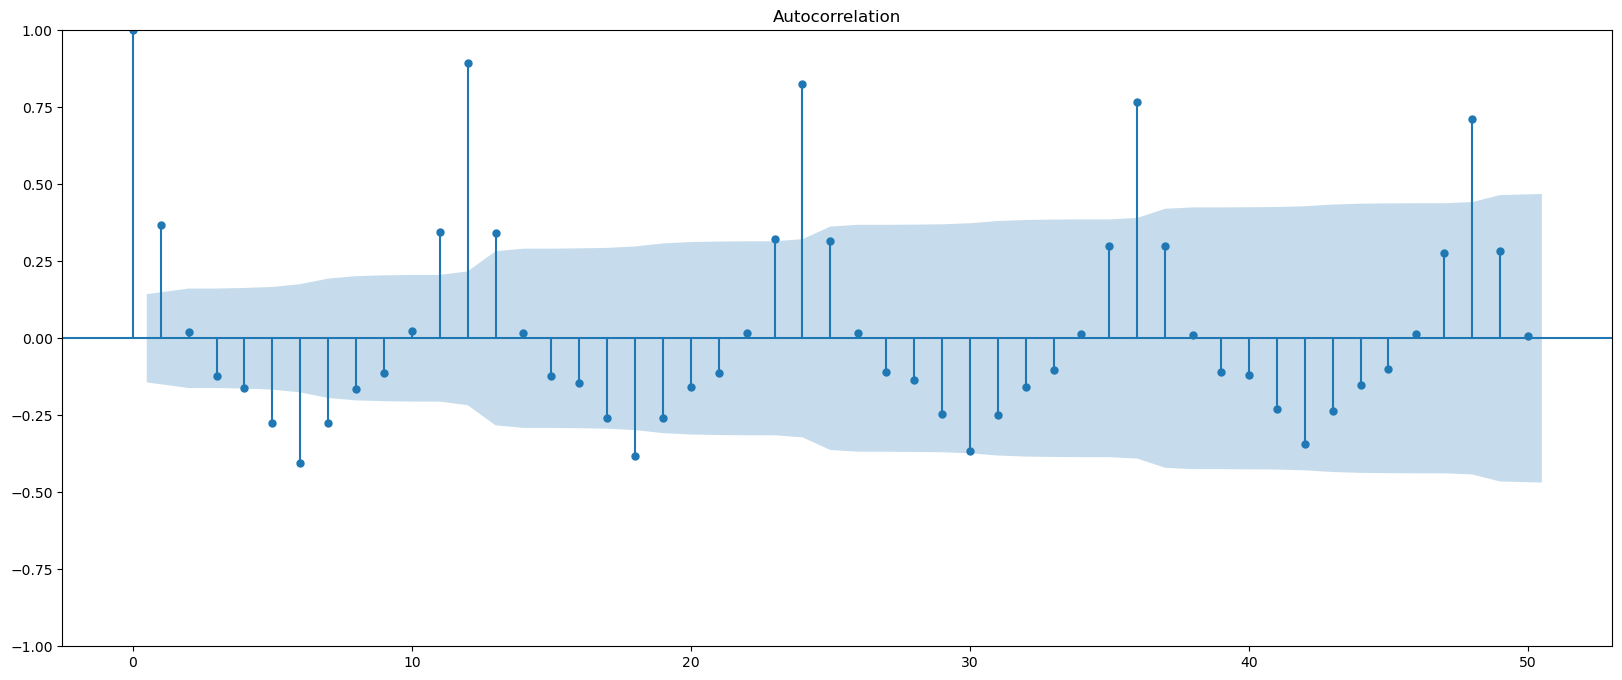

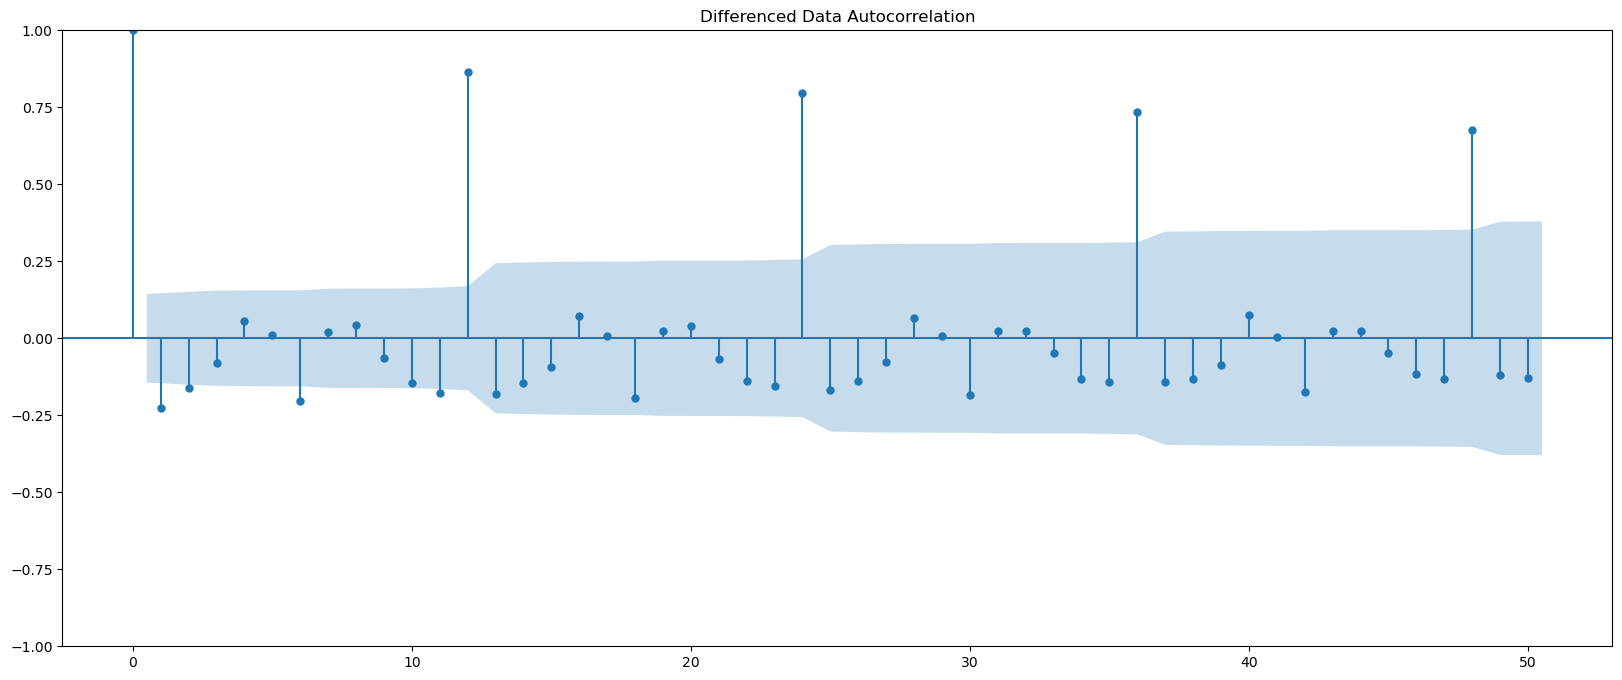

In [118]:
plot_acf(Sparkling_df['Sales'],lags=50)
plot_acf(Sparkling_df['Sales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

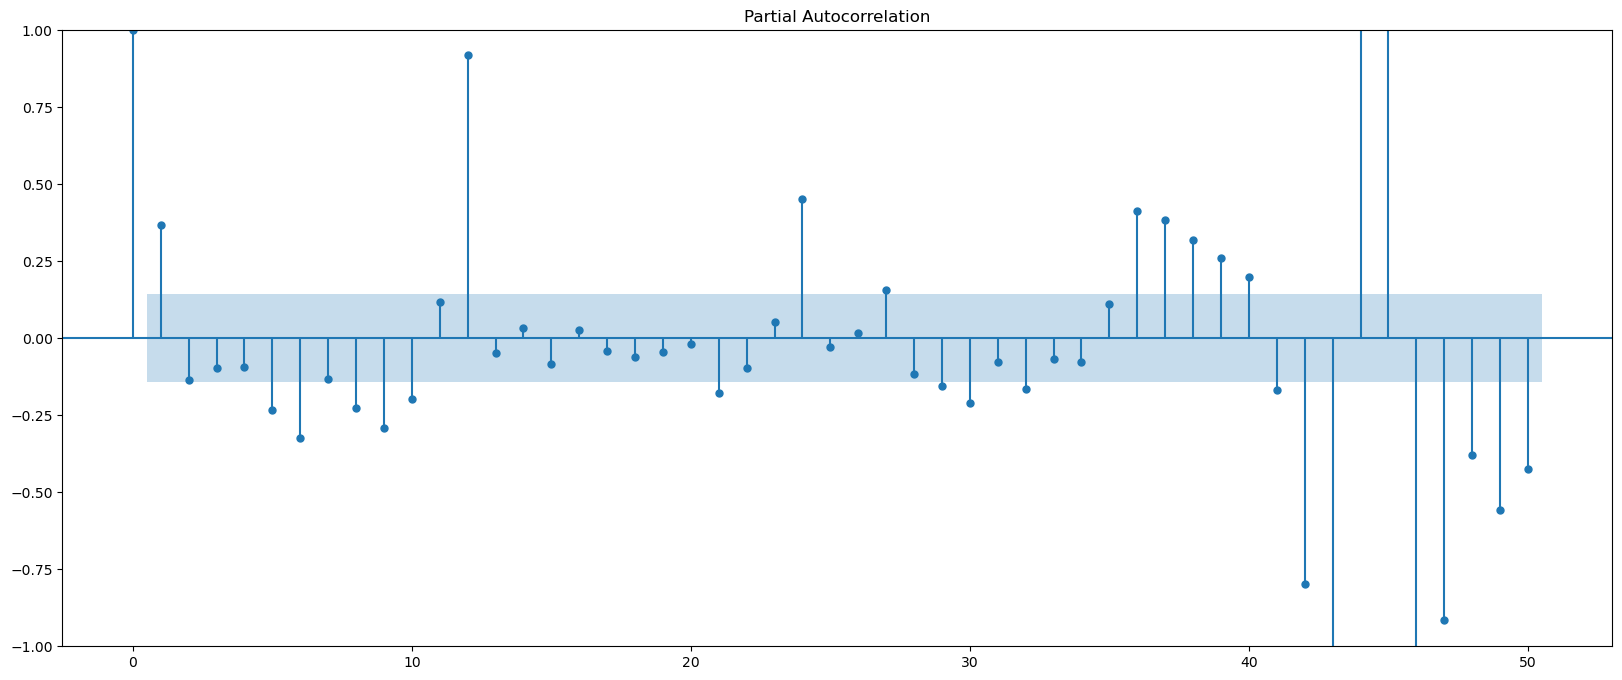

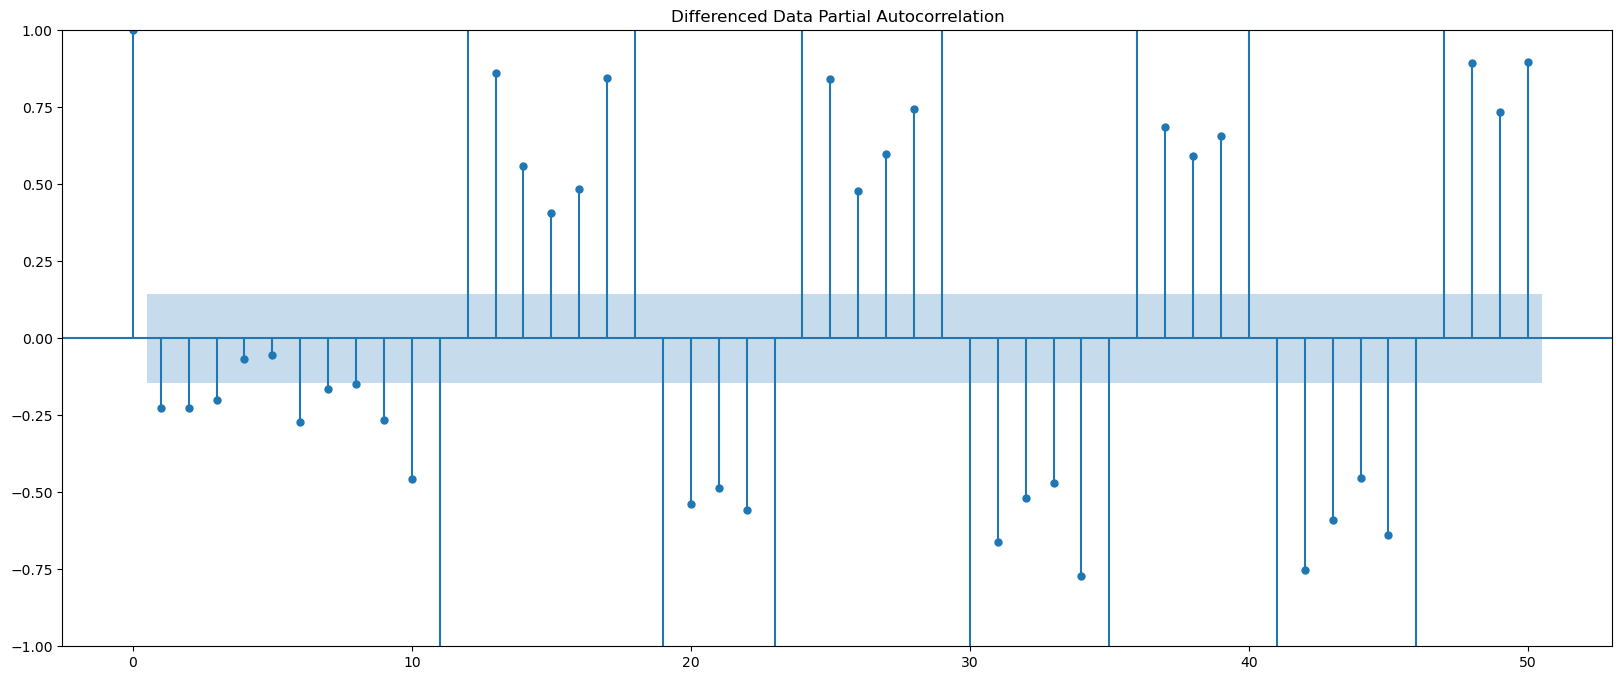

In [119]:
plot_pacf(Sparkling_df['Sales'],lags=50)
plot_pacf(Sparkling_df['Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

* From the above plots, we can say that there seems to be a seasonality in the data.

**Check for stationarity of the Train Time Series data.**

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:

H0 : Test Time Series has a unit root and is thus non-stationary.
H1 : Test Time Series does not have a unit root and is thus stationary.
We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the α value.

We see that at 5% significant level the Time Series is non-stationary.

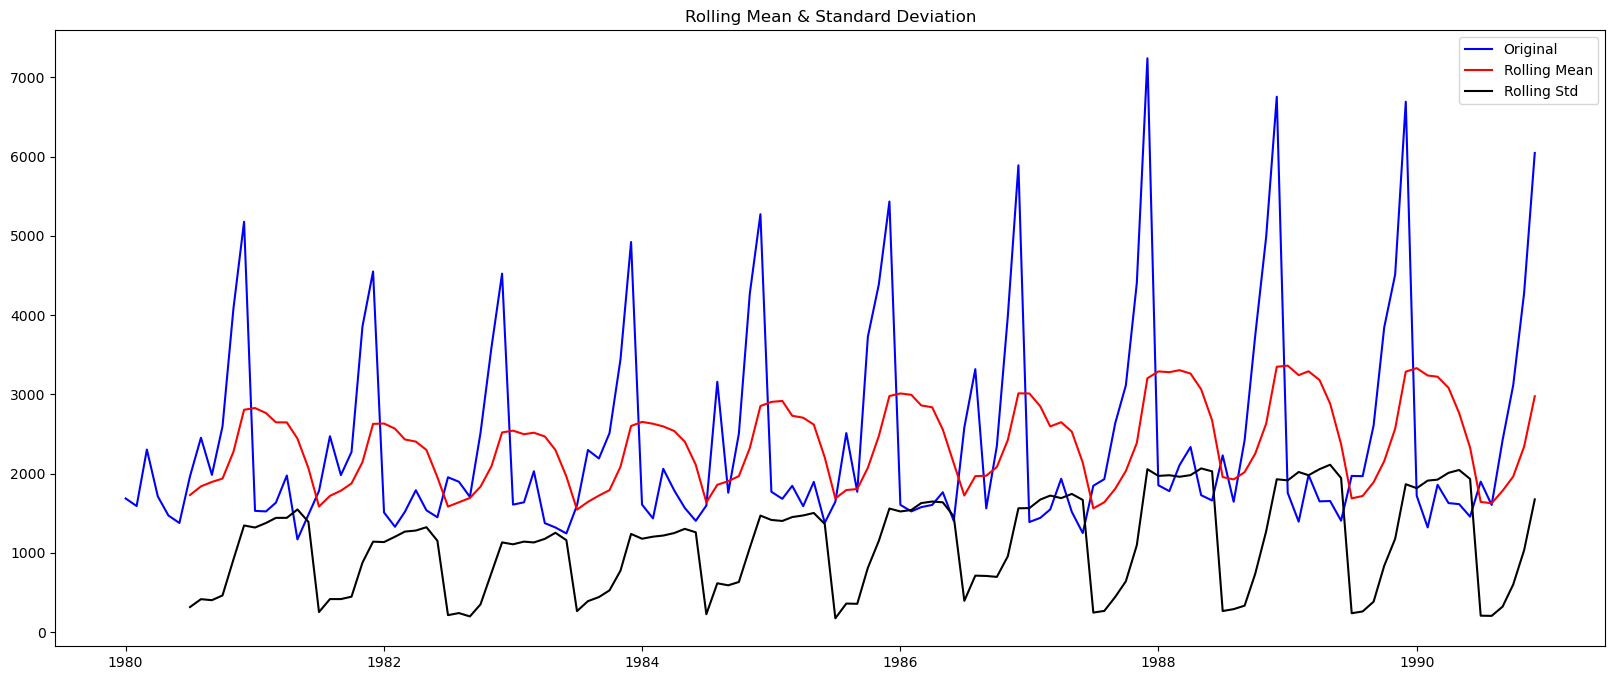

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [120]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')
test_stationarity(train['Sales'])

* We see that at 5% significant level the Train Time Series is non-stationary.
* Let us take a difference of order 1 and check whether the Time Series is stationary or not.

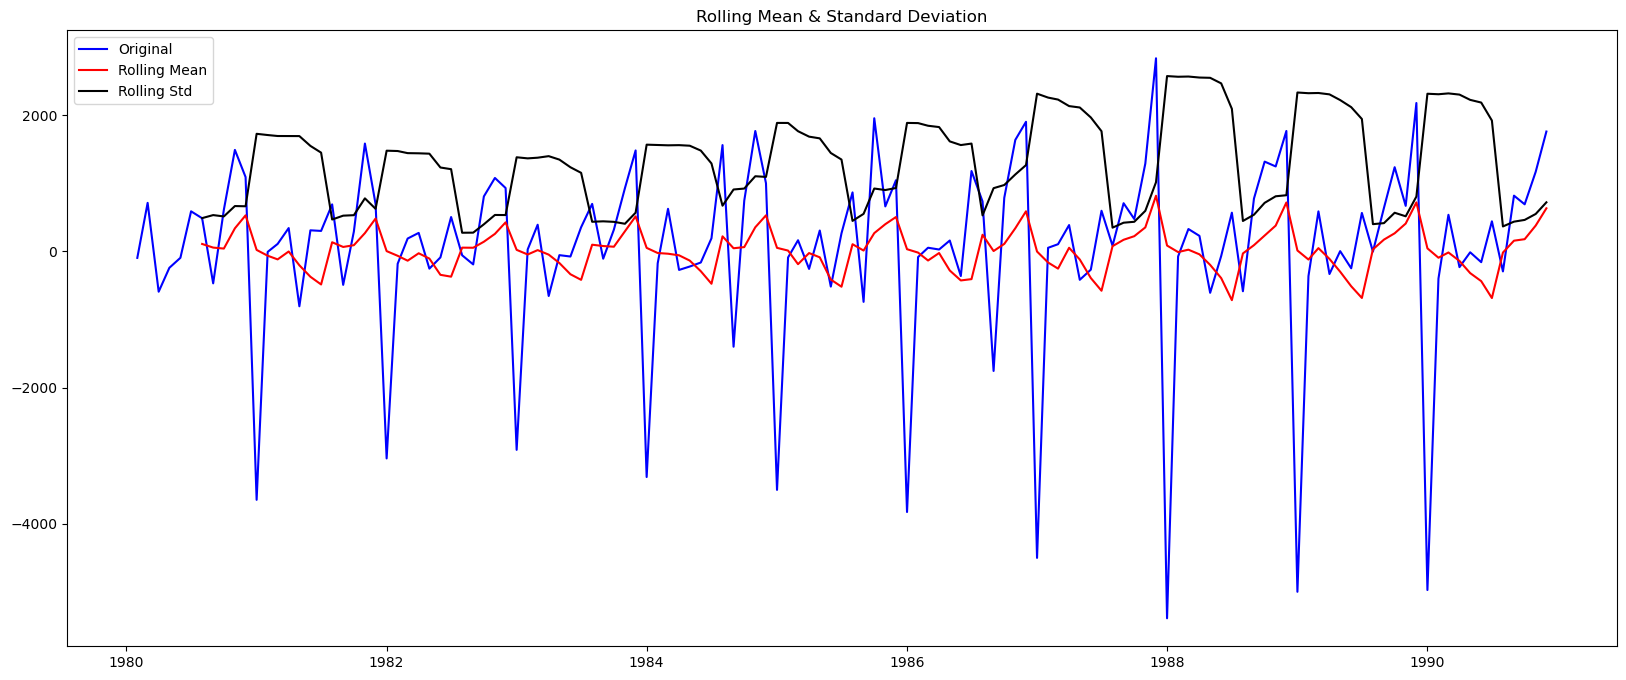

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [121]:
test_stationarity(train['Sales'].diff().dropna())

* We see that at 𝛼 = 0.05 Train Time Series is indeed stationary.
* We see that afer taking a difference of order 1 the series have become stationary = 0.05.

**Note: If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there. You can look at other kinds of transformations as part of making the time series stationary like taking logarithms.**

### <span style='color:Blue'> 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.</span>

**Note: The data has some seasonality so ideally we should build a SARIMA model. But for demonstration purposes we are building an ARIMA model both by looking at the minimum AIC criterion and by looking at the ACF and the PACF plots.**

### Auto - Arima Model

In [122]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3) # p = 0,1,2... q=0,1,2
d= range(1,2) # d=1
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [123]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [124]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sales'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015591336
ARIMA(0, 1, 2) - AIC:2234.408323131676
ARIMA(1, 1, 0) - AIC:2266.6085393190087
ARIMA(1, 1, 1) - AIC:2235.755094673378
ARIMA(1, 1, 2) - AIC:2234.5272004508324
ARIMA(2, 1, 0) - AIC:2260.365743968086
ARIMA(2, 1, 1) - AIC:2233.7776263084434
ARIMA(2, 1, 2) - AIC:2213.5092122972337


In [125]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
8  (2, 1, 2)  2213.509212
7  (2, 1, 1)  2233.777626
2  (0, 1, 2)  2234.408323
5  (1, 1, 2)  2234.527200
4  (1, 1, 1)  2235.755095
6  (2, 1, 0)  2260.365744
1  (0, 1, 1)  2263.060016
3  (1, 1, 0)  2266.608539
0  (0, 1, 0)  2267.663036

In [126]:
auto_ARIMA = ARIMA(train['Sales'], order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 10 Dec 2023   AIC                           2213.509
Time:                        22:03:25   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.781      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.741      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.218      0.0

### Predict on the Test Set using this model and evaluate the model.

In [127]:
from sklearn.metrics import  mean_squared_error

In [128]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

rmse = mean_squared_error(test['Sales'], predicted_auto_ARIMA.tolist(), squared=False)
print(rmse)

1299.9796651035053


In [129]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Auto_ARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE
RegressionOnTime                                    1275.867052
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.995,SimpleExponentialSmoothing              1316.035487
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1778.564670
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  1316.035487
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302
Auto_ARIMA                                          1299.979665

In [130]:
arm_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2)'])

arm_resultsDf

RMSE
ARIMA(2,1,2)  1299.979665

### Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

* Let us look at the ACF and the PACF plots once more.

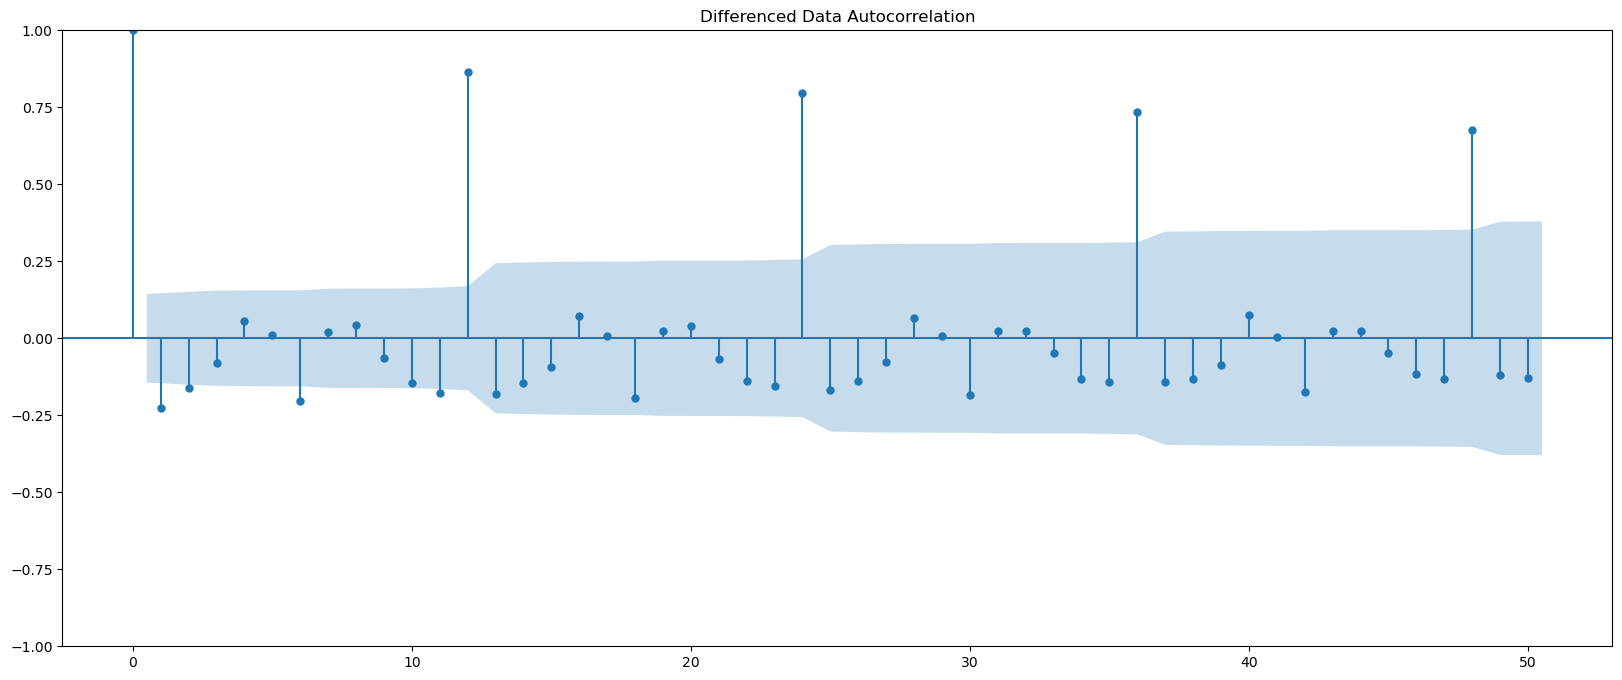

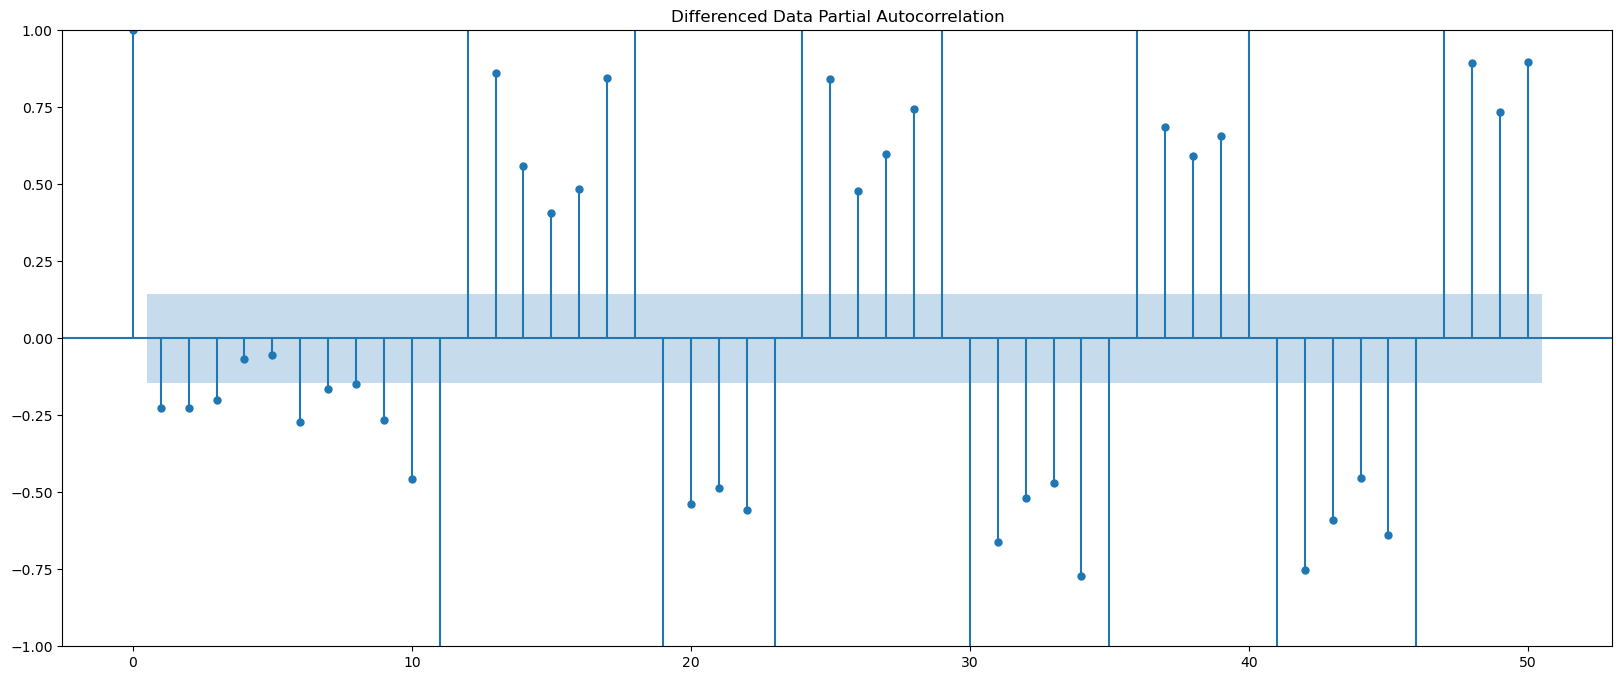

In [131]:
plot_acf(Sparkling_df['Sales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(Sparkling_df['Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0.
The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 0.
By looking at the above plots, we can say that both the PACF and ACF plot cuts-off at lag 0.

In [132]:
# Assuming the index is not in datetime format, convert it to datetime first
train.index = pd.to_datetime(train.index)

# Resample the data to monthly frequency if needed
train_monthly = train['Sales'].resample('M').mean()  # or sum(), depending on your data

# Fit ARIMA model with the updated data and frequency
manual_ARIMA = ARIMA(train_monthly.astype('float64'), order=(0, 1, 0), freq='M')
results_manual_ARIMA = manual_ARIMA.fit()
print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  132
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1132.832
Date:                Sun, 10 Dec 2023   AIC                           2267.663
Time:                        22:03:26   BIC                           2270.538
Sample:                    01-31-1980   HQIC                          2268.831
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.885e+06   1.29e+05     14.658      0.000    1.63e+06    2.14e+06
Ljung-Box (L1) (Q):                   3.07   Jarque-Bera (JB):               198.83
Prob(Q):                              0.08   Pr

* We get a comparatively simpler model by looking at the ACF and the PACF plots.

**Note: When we see that both the AR(p) and the MA(q) model are of order 0, we have to convert the input variable into a 'float64' type variable else Python might throw an error.**

### Predict on the Test Set using this model and evaluate the model.

In [133]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [134]:
rmse = mean_squared_error(test['Sales'],predicted_manual_ARIMA,squared=False)
print(rmse)

3864.2793518443914


In [135]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(0,1,0)'])


resultsDf1 = pd.concat([arm_resultsDf,temp_resultsDf])

resultsDf1

RMSE
ARIMA(2,1,2)  1299.979665
ARIMA(0,1,0)  3864.279352

* We see that there is difference in the RMSE values for both the models, but remember that the second model is a much simpler model.

### Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

### AUTO- SARIMA

* Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

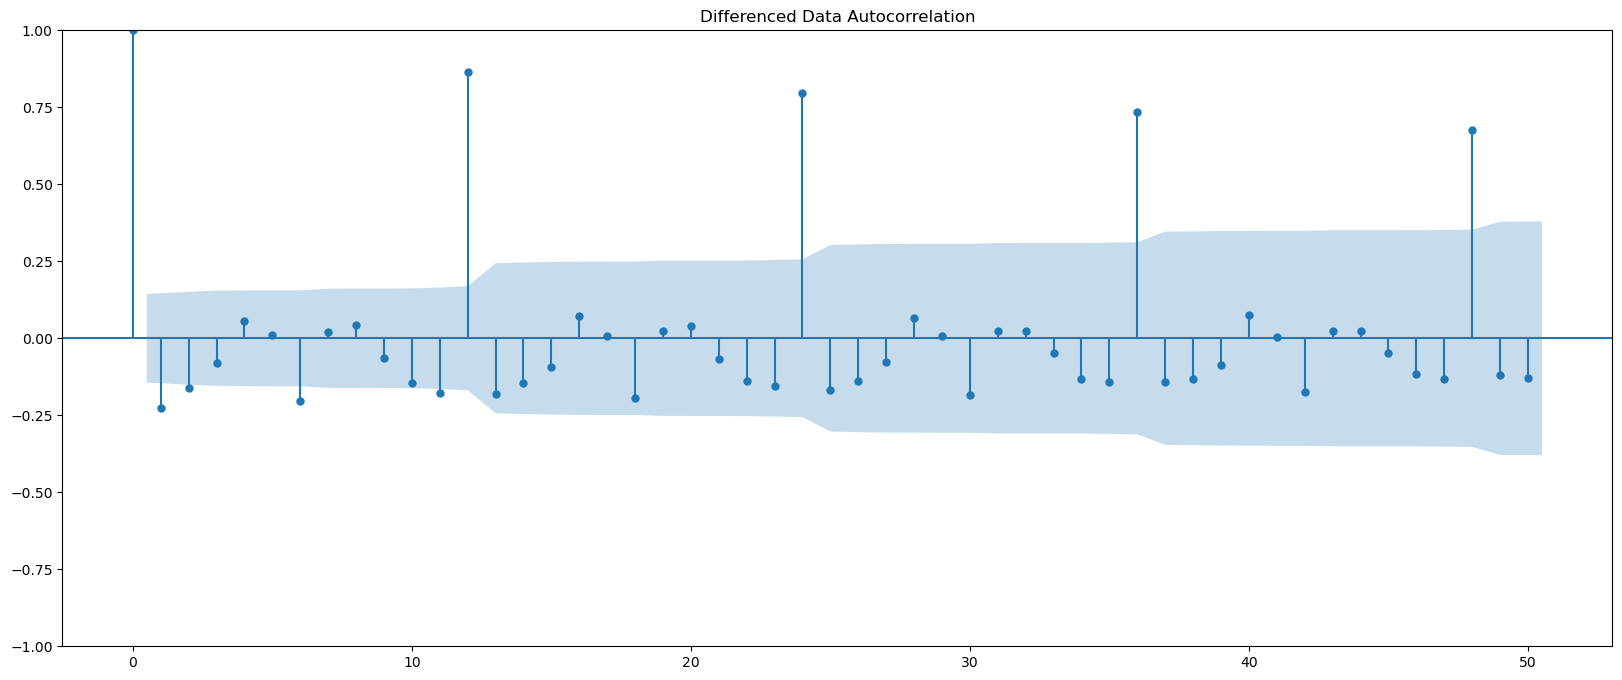

In [136]:
plot_acf(Sparkling_df['Sales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

* We see that there can be a seasonality of 6 as well as 12. We will run our auto SARIMA models by setting seasonality both as 6 and 12.

### Setting the seasonality as 6 for the first iteration of the auto SARIMA model.

In [137]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [138]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [139]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616842675
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640236566
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:7441.156431906364
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456677
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301389083
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791705


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:3742.4318141456943
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470856
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.205415861082
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920779


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:3758.958248306006
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:1467.4574095308408
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:1469.1871052625834
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:1471.0594530064452


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:2950.5228748181057
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.162907850585
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566844
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089572877635
SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:7427.391419134551
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881837984
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.090319373047
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1319652491622


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:3331.3367708164665
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.675195417734
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245084443296
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018848793137


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:3242.048908315573
SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:1428.4607679619842
SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:1428.8728002829832
SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:1429.5891874826318


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:3005.873287168287
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:2187.4410101687017
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1887.9128007201514
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:1659.8789890855069
SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:7347.317280185878
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1790.0326332160769
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1724.1675077971956
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:1557.1605067010178


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:3938.0906669572923
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:1603.9654774426328
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:1600.5438800512209
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:1557.1215637171463


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:3857.1624964720536
SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:1428.5993408299794
SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:1429.744836947573
SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:1430.6883847308823


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:3617.62289847565
SARIMA(0, 1, 3)x(0, 0, 0, 12) - AIC:2168.0925408438247
SARIMA(0, 1, 3)x(0, 0, 1, 12) - AIC:1873.9770693356252
SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:1643.29736610002


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:346.27350155954963
SARIMA(0, 1, 3)x(1, 0, 0, 12) - AIC:1792.0310670521235
SARIMA(0, 1, 3)x(1, 0, 1, 12) - AIC:1710.6404077946788
SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:1542.7419136121587


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:2626.7265697981293
SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:1604.571580710691
SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:1601.067484776867
SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:1543.0486175660483
SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:3451.5885873884977
SARIMA(0, 1, 3)x(3, 0, 0, 12) - AIC:1429.6529524308173
SARIMA(0, 1, 3)x(3, 0, 1, 12) - AIC:1441.1435178778709
SARIMA(0, 1, 3)x(3, 0, 2, 12) - AIC:1431.1544776629594


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:4034.8073319315013
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:2250.3181267386713
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1954.3938339903916
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:1721.2688476353958
SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:7508.163889427939
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1811.2440279330842
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1788.5343594805738
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:1616.4894402556495


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:3555.193808940587
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:1621.635508012921
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:1617.1356132080143
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:1616.5412067533618


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:3481.3079449981556
SARIMA(1, 1, 0)x(3, 0, 0, 12) - AIC:1440.513464037472
SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:1442.1719780410137
SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:1443.7660398597513


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:3203.77402849772
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:2204.934049154559
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1907.3558974129917
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:1678.0981352612555
SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:7424.533576402358
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1775.1424466961123
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1739.7120331889962
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:1571.3248863677672
SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:3421.592059506643
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:1590.6161606880116
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:1586.3142234304007
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:1571.8069969776557


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:3319.193525686612
SARIMA(1, 1, 1)x(3, 0, 0, 12) - AIC:1414.9112074175507
SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:1415.9502479080563
SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:1417.0903511320312


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:3098.7190959557292
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:2188.463345050416
SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1889.7708307506432
SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:1659.6291421451351
SARIMA(1, 1, 2)x(0, 0, 3, 12) - AIC:7349.248529354953
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1771.8259805902667
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1723.9952185524417
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:1555.5842468484243


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:4185.481876911815
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:1588.421693192215
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:1585.515290349777
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:1555.9345632278373


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:4103.9637992145845
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:1413.8102395208832
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:1414.9147058068163
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:1415.9690315192681


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:3865.2982093443034
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:2171.026403977749
SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:1869.938144932518
SARIMA(1, 1, 3)x(0, 0, 2, 12) - AIC:1646.5217647491497
SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:16.0
SARIMA(1, 1, 3)x(1, 0, 0, 12) - AIC:1772.3921596092307
SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:1711.95548881704
SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:1542.5053495219388


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:3184.7784909034835
SARIMA(1, 1, 3)x(2, 0, 0, 12) - AIC:1590.4154074565195
SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:1587.3668970426809
SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:1543.1292698776433


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:3103.607694859126
SARIMA(1, 1, 3)x(3, 0, 0, 12) - AIC:1415.7723360496666
SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:1416.751026959451
SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:1417.7649187924014


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:3045.4950891013314
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:2227.302761872421
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1946.4383435408604
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:1711.4123039835
SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:7504.526807024466
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1780.7646066058476
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1756.9357347161542
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:1600.970220411125
SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:3733.282356696875
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:1592.2403464817833
SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:1587.6344991504984
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:1585.919173635248


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:3557.0857337626685
SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC:1411.9449728030795
SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC:1413.1017619047702
SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC:1414.1975650164306
SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:3369.996863540069
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:2199.858613145673
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1905.0209495422107
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:1675.4234080329527
SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:7424.346020440857
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1792.8234290832254
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1740.0911274627342
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:1572.043884394331


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:2731.920791447947
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1577.1235060897175
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1573.1595857676236
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1572.342863204192
SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:3607.9267231374024
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:1402.467332894949
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:1403.1221328135316
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:1403.8241332009577


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:2847.4333256385553
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:2176.8681147583393
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1892.2372618012723
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:1661.5523432571715
SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:7350.942466338702
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1757.2140931427282
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1725.6086300540762
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1557.3404017902274


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:3412.612711214422
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:1576.0455927177602
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:1573.5476000789977
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:1560.4513478248823


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:3406.230421867368
SARIMA(2, 1, 2)x(3, 0, 0, 12) - AIC:1401.4376155229668
SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:1402.5040417347652
SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:1403.43589134247


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:3033.841569535655
SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:2171.0395874096625
SARIMA(2, 1, 3)x(0, 0, 1, 12) - AIC:1866.915280709091
SARIMA(2, 1, 3)x(0, 0, 2, 12) - AIC:1646.7073522772869
SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:7263.081927022511
SARIMA(2, 1, 3)x(1, 0, 0, 12) - AIC:1757.835715562202
SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1710.8242063251782
SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:1542.5288901607937


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:3586.7263580964504
SARIMA(2, 1, 3)x(2, 0, 0, 12) - AIC:1577.6909621009122
SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:1571.4613913587687
SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:1543.9976756674976
SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:3539.9690558789994
SARIMA(2, 1, 3)x(3, 0, 0, 12) - AIC:1399.7898959620748
SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:1403.9922799990725
SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:1401.276300032641
SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:3303.910912354884
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:2208.40250139061
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:1946.368629141899
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:1709.5089923146286
SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:7503.735447062872
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:1762.7961104703274
SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:1740.3783869532058
SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:1600.047197213099


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:3306.807335399122
SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:1578.27480255634
SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:1572.9330812875376
SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:1571.6808202143936
SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:3610.174053317011
SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:1396.867862039468
SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:1397.67747087659
SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:1398.3074657015138


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:3038.06280894953
SARIMA(3, 1, 1)x(0, 0, 0, 12) - AIC:2188.2220983380075
SARIMA(3, 1, 1)x(0, 0, 1, 12) - AIC:1906.9733080149717
SARIMA(3, 1, 1)x(0, 0, 2, 12) - AIC:1677.4234050495345
SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:7426.749958295574
SARIMA(3, 1, 1)x(1, 0, 0, 12) - AIC:1746.2222530086697
SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1727.100918610676
SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:1573.6844988616322


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:2733.9199058472527
SARIMA(3, 1, 1)x(2, 0, 0, 12) - AIC:1564.9377505414363
SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:1576.2956926405266
SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:1576.3498145252447
SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:3572.2358435341357
SARIMA(3, 1, 1)x(3, 0, 0, 12) - AIC:1387.7883313099637
SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:1388.6814843598447
SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:1389.195899060889
SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:3337.9538862218715
SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:2187.3147271656717
SARIMA(3, 1, 2)x(0, 0, 1, 12) - AIC:1887.78043530412
SARIMA(3, 1, 2)x(0, 0, 2, 12) - AIC:1659.6255145912246
SARIMA(3, 1, 2)x(0, 0, 3, 12) - AIC:7351.329197535243
SARIMA(3, 1, 2)x(1, 0, 0, 12) - AIC:1744.9635863811031
SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:1727.5806798470855
SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:1559.3372433369602


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:3647.000302964309
SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:1566.956455465201
SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:1560.7894392767544
SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:1559.8053790501447
SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:3578.628056495706
SARIMA(3, 1, 2)x(3, 0, 0, 12) - AIC:1401.954805231042
SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:1388.6026167156149
SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:1389.7159140156393


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:2560.7902606207504
SARIMA(3, 1, 3)x(0, 0, 0, 12) - AIC:2155.7749542046704
SARIMA(3, 1, 3)x(0, 0, 1, 12) - AIC:1877.329578815812
SARIMA(3, 1, 3)x(0, 0, 2, 12) - AIC:1643.78299700095
SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:7259.955017860645
SARIMA(3, 1, 3)x(1, 0, 0, 12) - AIC:1750.4741259693008
SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1709.2985020207236
SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:1544.3935796360643


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:2640.9890067170218
SARIMA(3, 1, 3)x(2, 0, 0, 12) - AIC:1567.176723349472
SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:1561.9118946702501
SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:1547.4740803643012
SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:3412.8060776184075
SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:1387.497015716352
SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:1393.5506840309074
SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:1391.6929262310673


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:2883.1786389690274


In [140]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
115  (1, 1, 3)  (0, 0, 3, 12)    16.000000
51   (0, 1, 3)  (0, 0, 3, 12)   346.273502
252  (3, 1, 3)  (3, 0, 0, 12)  1387.497016
220  (3, 1, 1)  (3, 0, 0, 12)  1387.788331
237  (3, 1, 2)  (3, 0, 1, 12)  1388.602617

In [141]:
auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Sun, 10 Dec 2023   AIC                           1555.584
Time:                                    22:21:11   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6282      0.255     -2.463      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225   

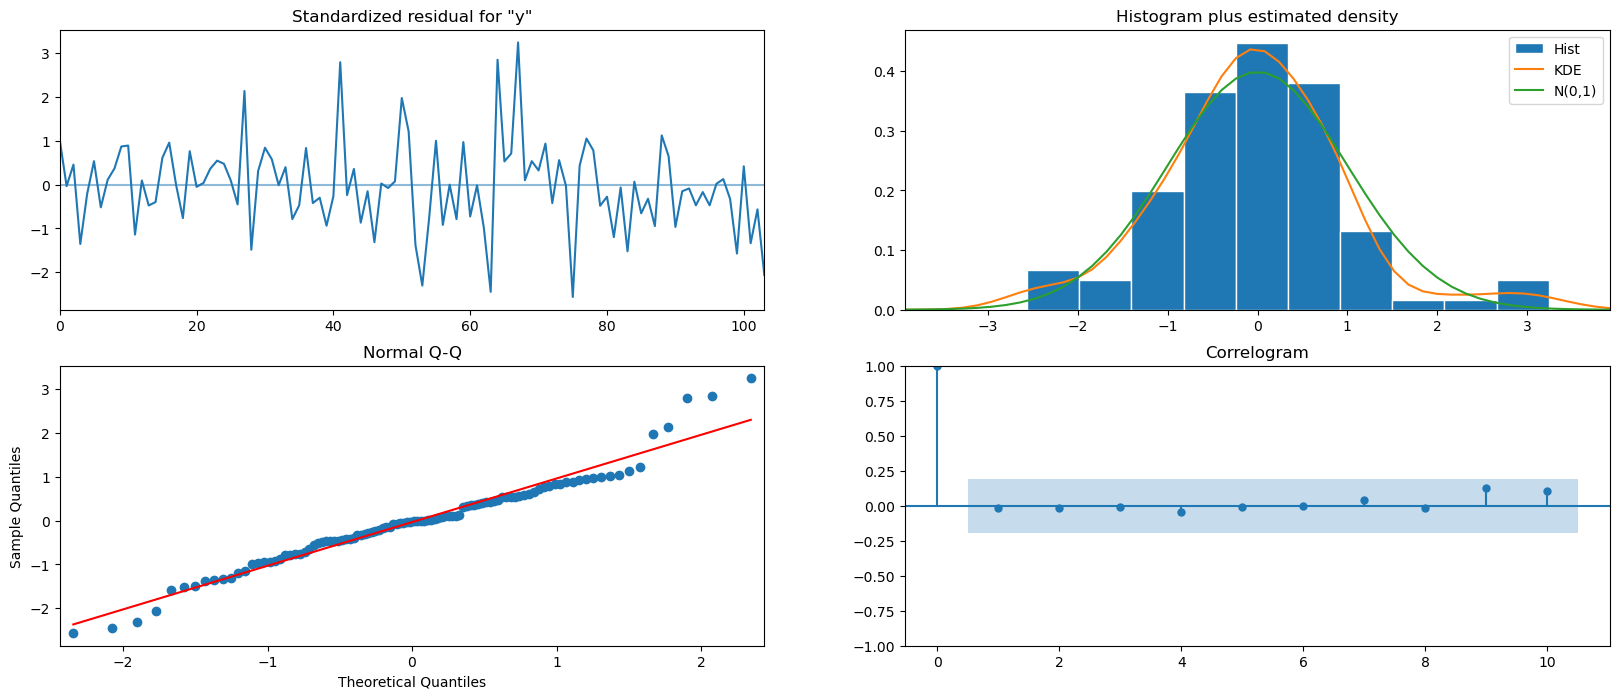

In [142]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

* From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots.

### Predict on the Test Set using this model and evaluate the model.

In [143]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1327.395533  388.342491     566.258236    2088.532829
1  1315.127014  402.004735     527.212211    2103.041817
2  1621.598790  401.998342     833.696517    2409.501062
3  1598.882436  407.235742     800.715048    2397.049824
4  1392.699905  407.965614     593.101994    2192.297815

In [144]:
rmse = mean_squared_error(test['Sales'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

528.6103138344198


In [145]:
resultsDf_9_1 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['(1,1,1),(2,0,3,12),Auto_SARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_9_1])
resultsDf

Test RMSE
RegressionOnTime                                    1275.867052
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.995,SimpleExponentialSmoothing              1316.035487
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1778.564670
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  1316.035487
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302
Auto_ARIMA                                          1299.979665
(1,1,1),(2,0,3,12),Auto_SARIMA                       528.610314

* We see that we have huge gain the RMSE value by including the seasonal parameters as well.

### Setting the seasonality as 12 for the second iteration of the auto SARIMA model.

In [146]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [147]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [148]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        try:
            SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                                     order=param,
                                                     seasonal_order=param_seasonal,
                                                     enforce_stationarity=False,
                                                     enforce_invertibility=False)
            
            results_SARIMA = SARIMA_model.fit(maxiter=1000)
            print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
            SARIMA_AIC = SARIMA_AIC.append({'param': param, 'seasonal': param_seasonal, 'AIC': results_SARIMA.aic},
                                           ignore_index=True)
        except Exception as e:
            print(f"SARIMA{param}x{param_seasonal} - Model fitting failed with error: {e}")
            continue

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616842675
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640236566
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456677
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301389083
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791705
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470856
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.205415861082
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920779
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.162907850585
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566844
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089572877635
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881837984
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.090319373047
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1319652491622
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.675195417734
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245084443296
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018848793137
SARIMA(0, 1, 2

In [149]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
50  (1, 1, 2)  (1, 0, 2, 12)  1555.584247
53  (1, 1, 2)  (2, 0, 2, 12)  1555.934563
26  (0, 1, 2)  (2, 0, 2, 12)  1557.121564
23  (0, 1, 2)  (1, 0, 2, 12)  1557.160507
77  (2, 1, 2)  (1, 0, 2, 12)  1557.340402

In [150]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Sun, 10 Dec 2023   AIC                           1555.584
Time:                                    22:22:57   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6282      0.255     -2.463      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225   

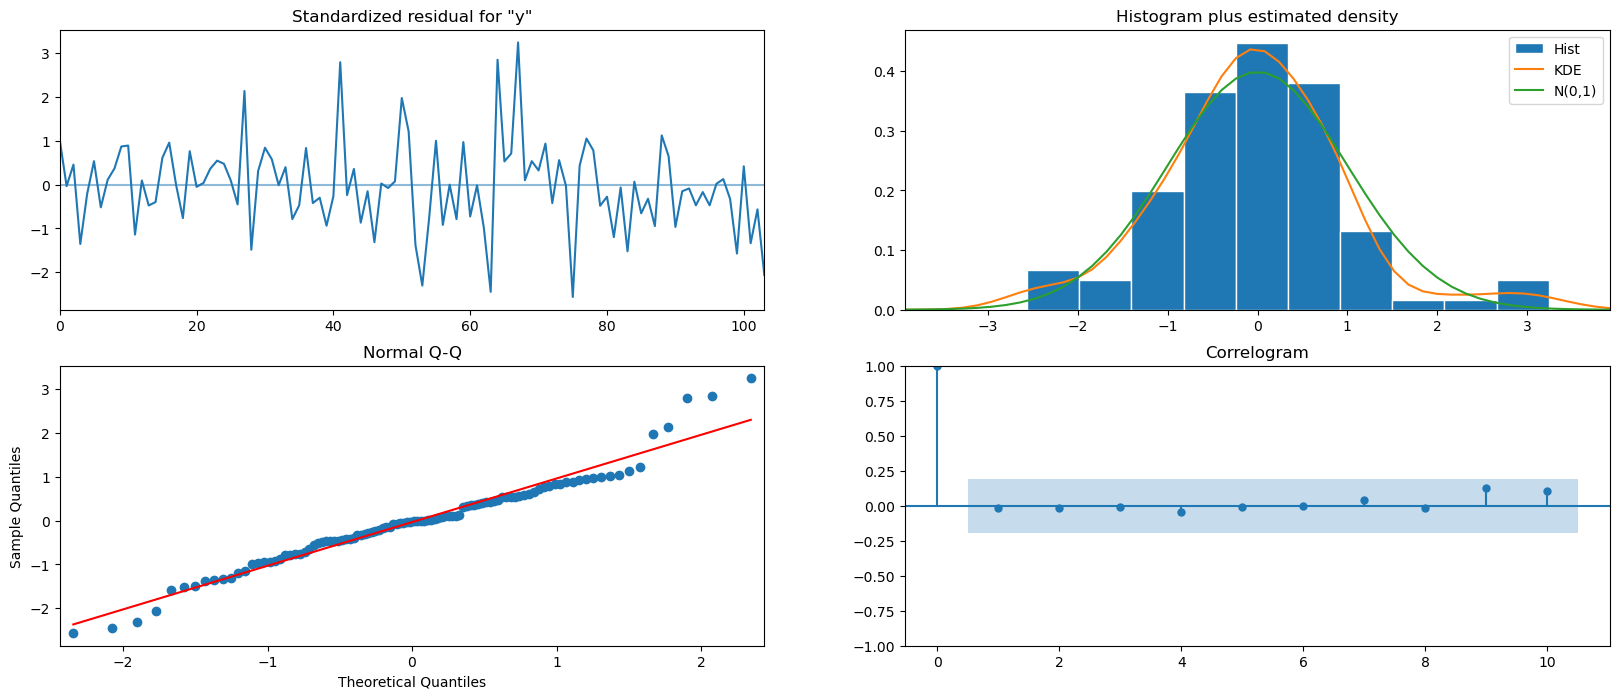

In [151]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

* Similar to the last iteration of the model where the seasonality parameter was taken as 6, here also we see that the model diagnostics plot does not indicate any remaining information that we can get.

### Predict on the Test Set using this model and evaluate the model.

In [152]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [153]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1327.395533  388.342491     566.258236    2088.532829
1  1315.127014  402.004735     527.212211    2103.041817
2  1621.598790  401.998342     833.696517    2409.501062
3  1598.882436  407.235742     800.715048    2397.049824
4  1392.699905  407.965614     593.101994    2192.297815

In [154]:
rmse = mean_squared_error(test['Sales'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

528.6103138344198


* We see that the RMSE value have not reduced further when the seasonality parameter was changed to 12.

In [155]:
resultsDf_9_1 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['(1,1,1),(1,0,2,12),Auto_SARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_9_1])
resultsDf

Test RMSE
RegressionOnTime                                    1275.867052
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.995,SimpleExponentialSmoothing              1316.035487
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1778.564670
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  1316.035487
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302
Auto_ARIMA                                          1299.979665
(1,1,1),(2,0,3,12),Auto_SARIMA                       528.610314
(1,1,1),(1,0,2,12),Auto_SARIMA                       528.610314

### <span style='color:Blue'> 7. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.</span>

### Model 11 : Manual ARIMA

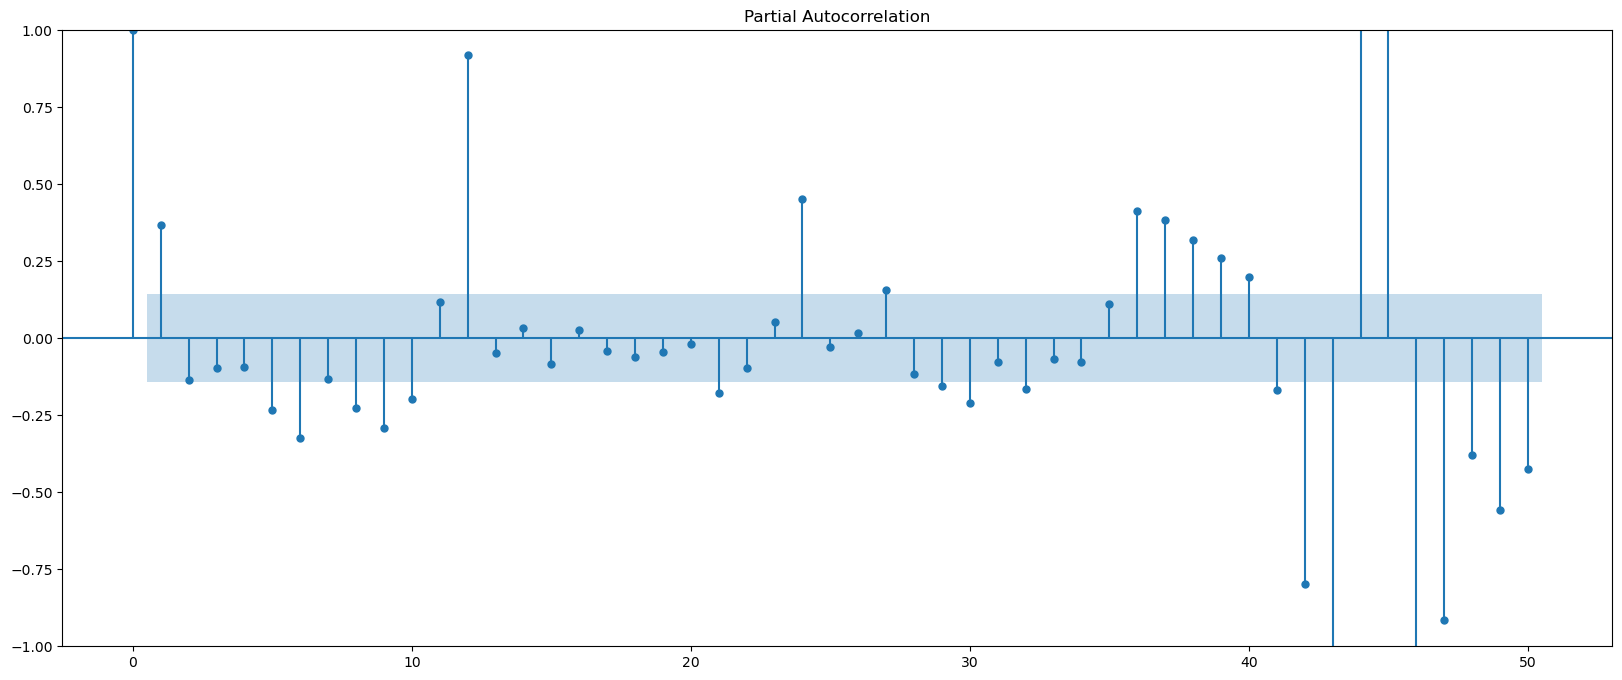

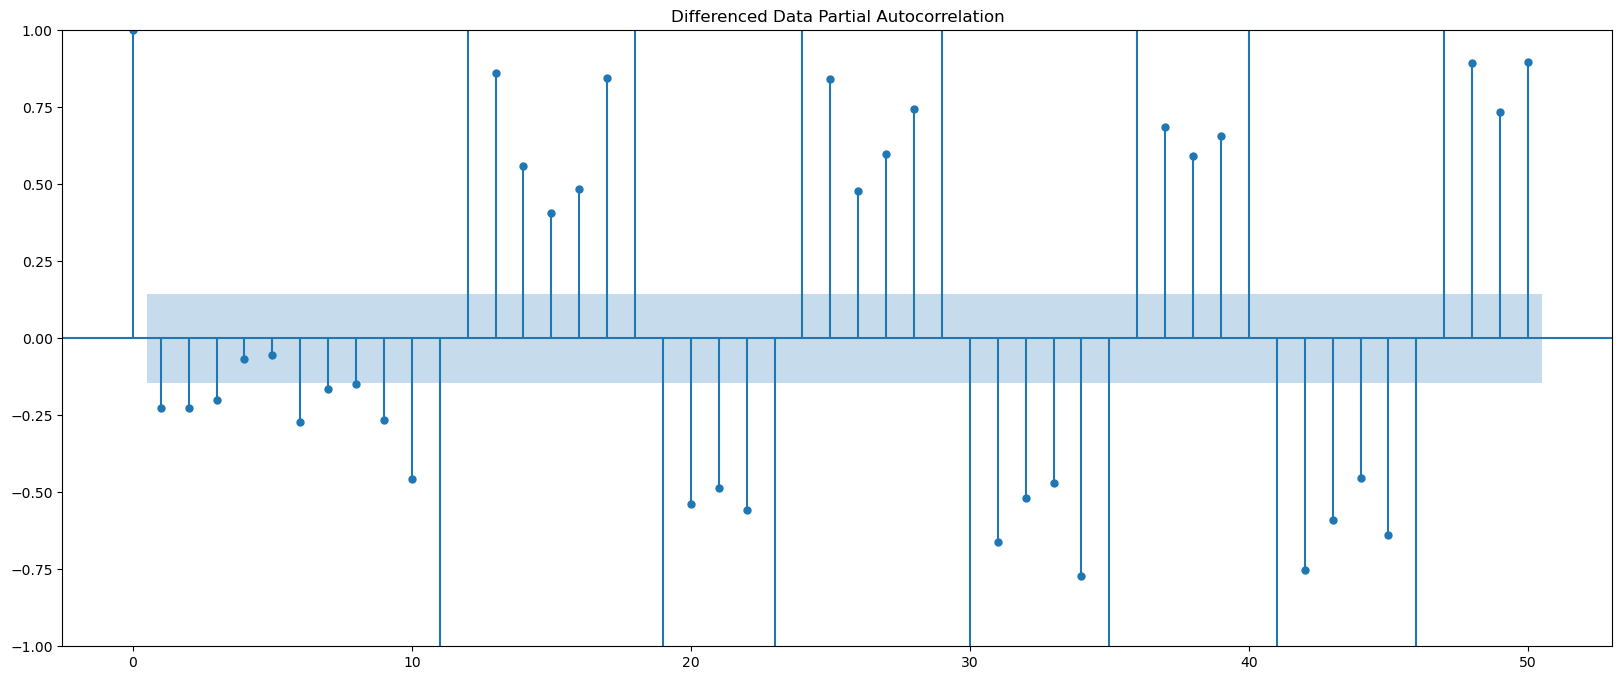

In [156]:
plot_pacf(Sparkling_df['Sales'],lags=50)
plot_pacf(Sparkling_df['Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

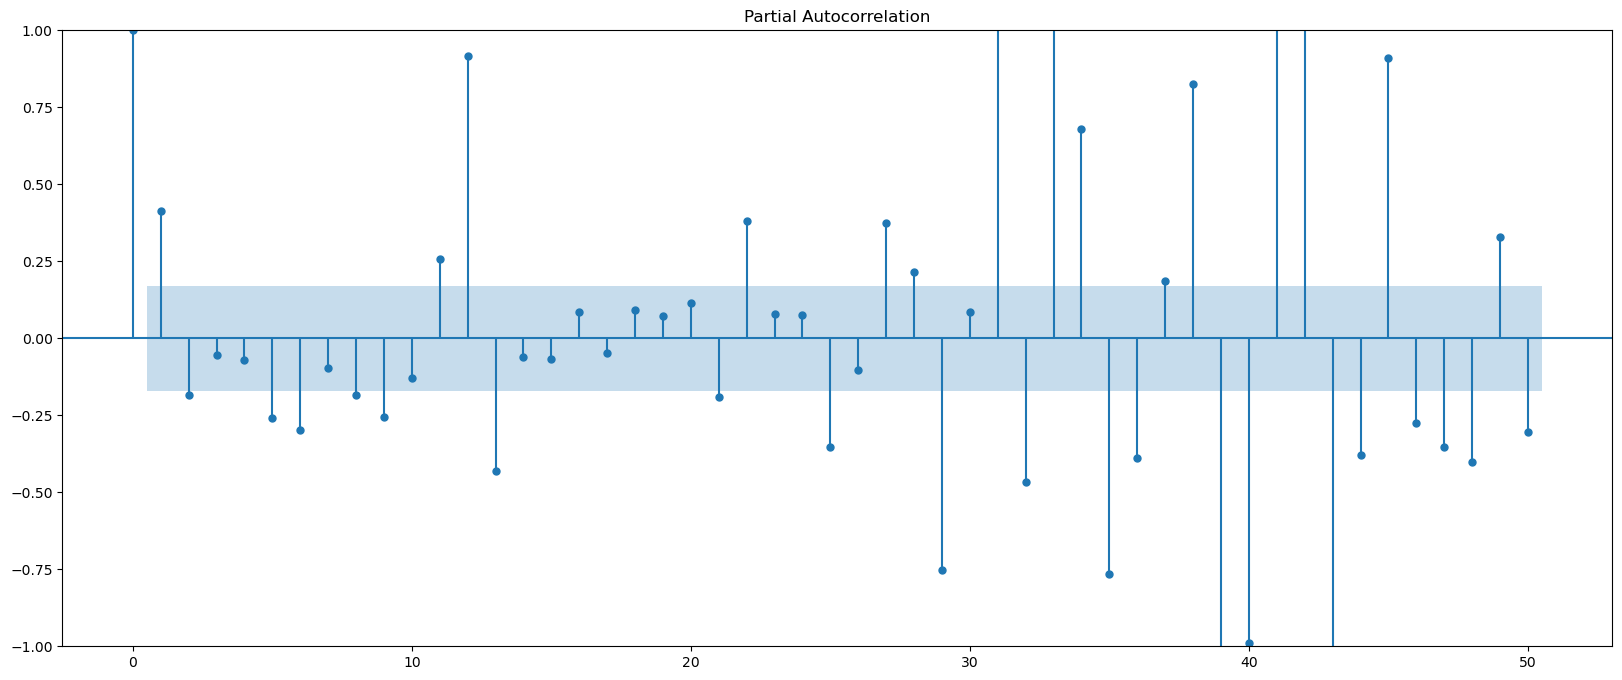

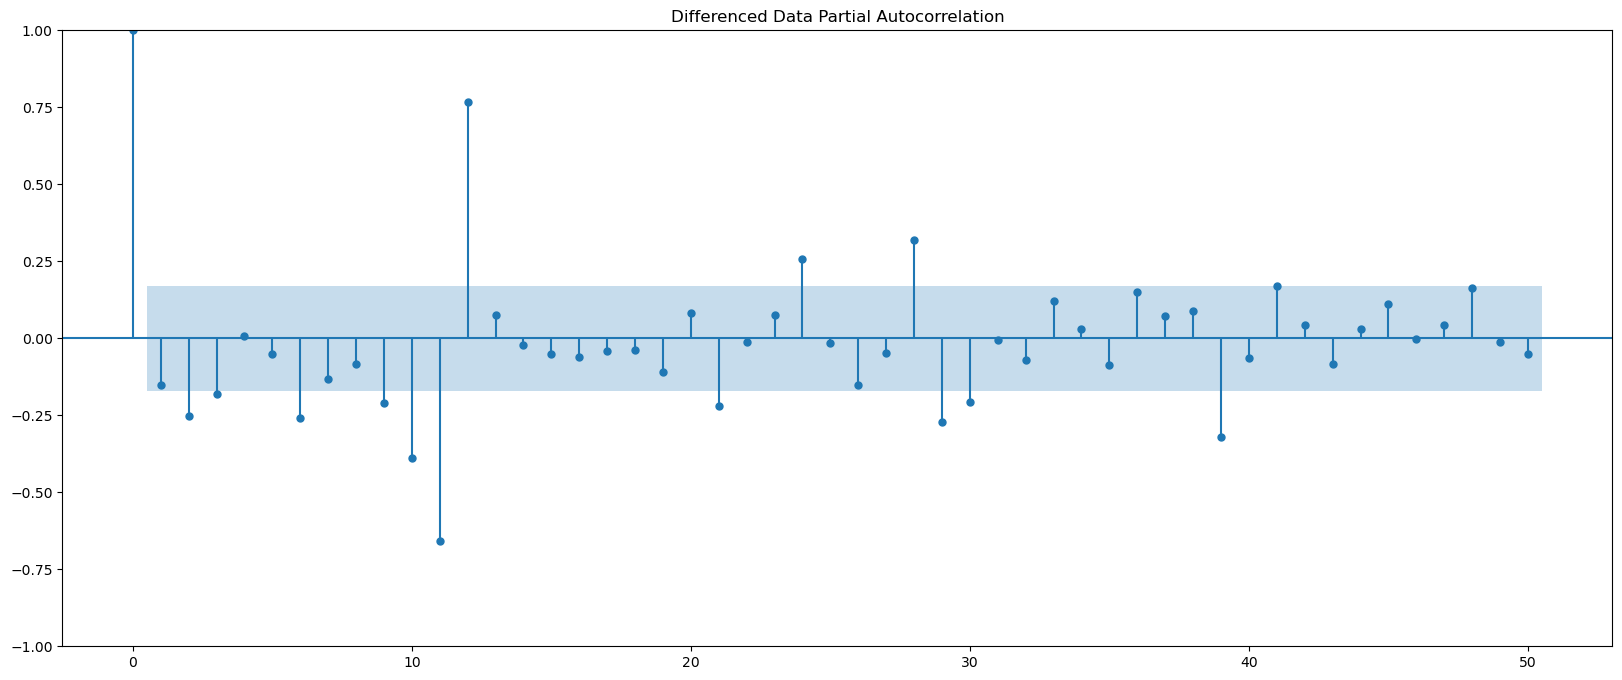

In [157]:
plot_pacf(train['Sales'],lags=50)
plot_pacf(train['Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [158]:
manual_ARIMA = ARIMA(train['Sales'], order=(1,1,1))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  132
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1114.878
Date:                Sun, 10 Dec 2023   AIC                           2235.755
Time:                        22:23:01   BIC                           2244.381
Sample:                    01-01-1980   HQIC                          2239.260
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4494      0.043     10.366      0.000       0.364       0.534
ma.L1         -0.9996      0.102     -9.811      0.000      -1.199      -0.800
sigma2      1.401e+06   7.57e-08   1.85e+13      0.0

C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


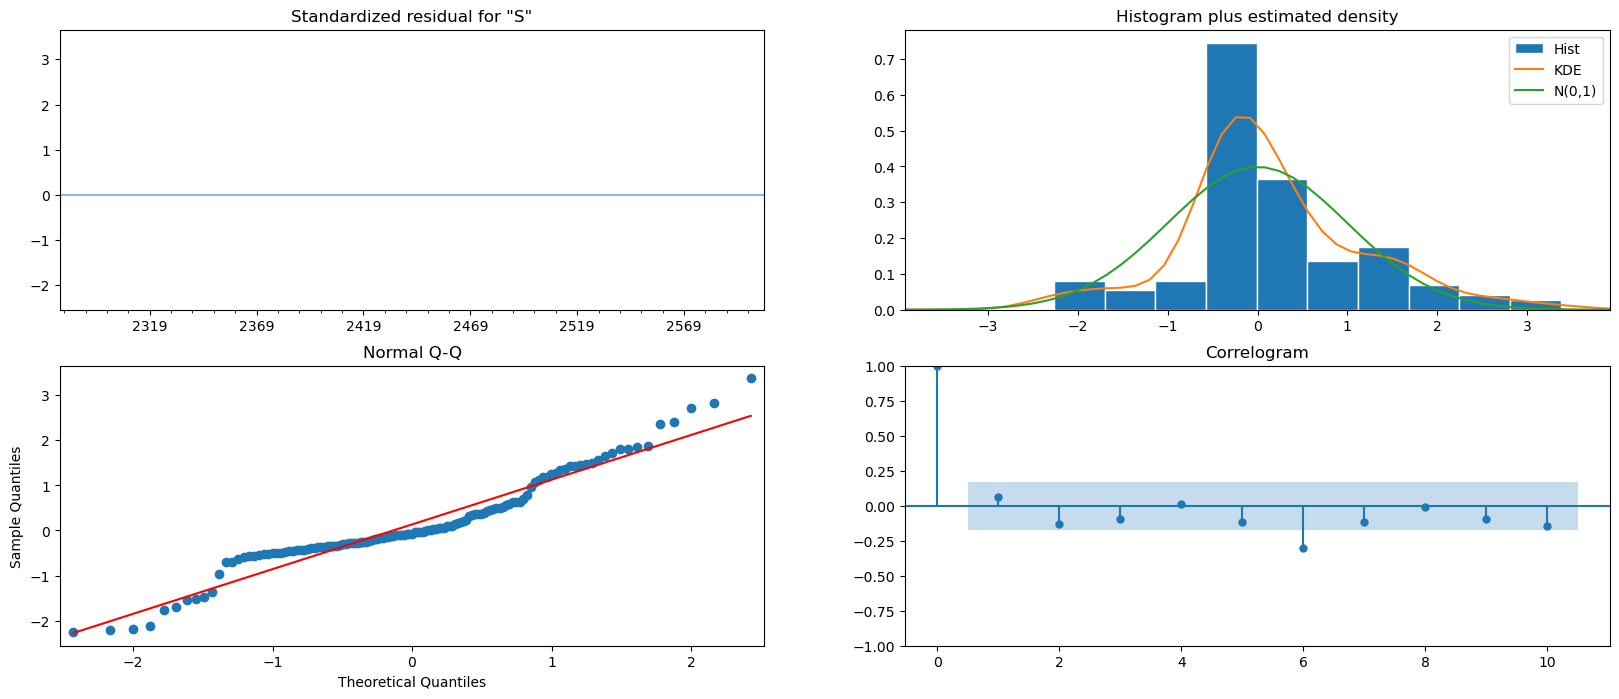

In [159]:
results_manual_ARIMA.plot_diagnostics();

### Model evaluation

In [160]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))
rmse = mean_squared_error(test['Sales'],predicted_manual_ARIMA,squared=False)
print('RMSE:',rmse)

RMSE: 1319.9367345922217


In [161]:
temp_resultsDf = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['ARIMA(3,1,3)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
RegressionOnTime                                    1275.867052
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.995,SimpleExponentialSmoothing              1316.035487
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1778.564670
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  1316.035487
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302
Auto_ARIMA                                          1299.979665
(1,1,1),(2,0,3,12),Auto_SARIMA                       528.610314
(1,1,1),(1,0,2,12),Auto_SARIMA                       528.610314
ARIMA(3,1,3)                                        1319.936735

### Model 12 : Manual SARIMA

In [162]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [163]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforc1e_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -882.088
Date:                            Sun, 10 Dec 2023   AIC                           1774.175
Time:                                    22:23:05   BIC                           1788.071
Sample:                                         0   HQIC                          1779.818
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1957      0.104      1.878      0.060      -0.009       0.400
ma.L1         -0.9404      0.053   

In [164]:
# Creating an empty list to store data
data = []

# Appending data to the list
data.append({'param': param, 'seasonal': param_seasonal, 'AIC': results_manual_SARIMA.aic})

# Creating a DataFrame from the list
SARIMA_AIC = pd.DataFrame(data)
SARIMA_AIC

param       seasonal          AIC
0  (2, 1, 2)  (2, 0, 2, 12)  1774.175347

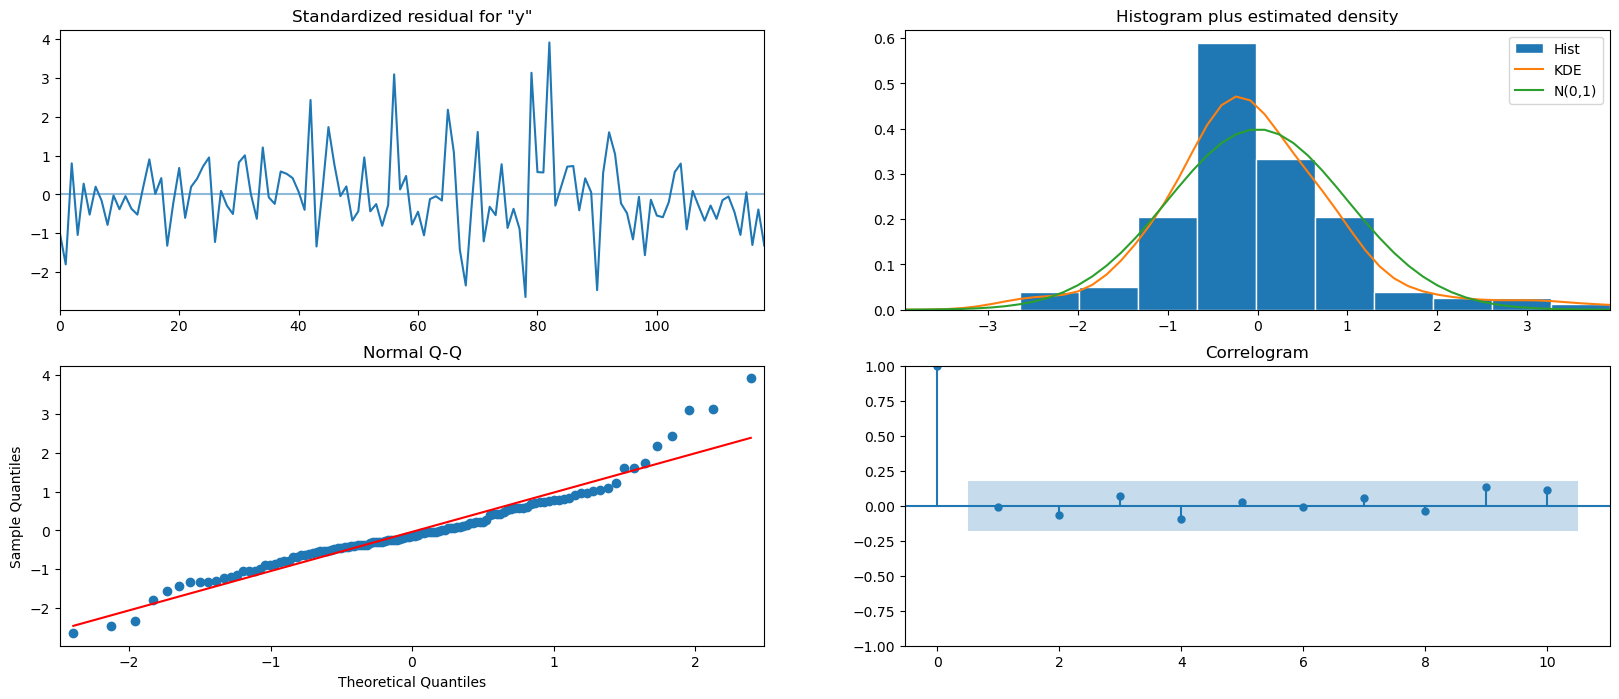

In [165]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [166]:
predicted_manual_SARIMA_6 = results_manual_SARIMA.get_forecast(steps=len(test))
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1543.900072  388.532059     782.391230    2305.408914
1  1311.208251  400.994070     525.274316    2097.142185
2  1810.538056  403.246201    1020.190025    2600.886086
3  1650.451757  404.472606     857.700016    2443.203497
4  1561.609706  405.532745     766.780130    2356.439281

In [167]:
rmse_manual_sarima = mean_squared_error(test['Sales'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse_manual_sarima)

359.61244721665327


In [168]:
resultsDf_10_1 = pd.DataFrame({'Test RMSE': rmse_manual_sarima}
                           ,index=['(1,1,1)(1,1,1,12),Manual_SARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_10_1])
resultsDf

Test RMSE
RegressionOnTime                                    1275.867052
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.995,SimpleExponentialSmoothing              1316.035487
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1778.564670
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  1316.035487
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302
Auto_ARIMA                                          1299.979665
(1,1,1),(2,0,3,12),Auto_SARIMA                       528.610314
(1,1,1),(1,0,2,12),Auto_SARIMA                       528.610314
ARIMA(3,1,3)                                        1319.936735
(1,1,1)(1,1,1,12),Manual_SARIMA                      359.612447

### <span style='color:Blue'> 8. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.</span>

In [169]:
resultsDf.sort_values(by=['Test RMSE'])

Test RMSE
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302
(1,1,1)(1,1,1,12),Manual_SARIMA                      359.612447
(1,1,1),(1,0,2,12),Auto_SARIMA                       528.610314
(1,1,1),(2,0,3,12),Auto_SARIMA                       528.610314
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
SimpleAverageModel                                  1275.081804
RegressionOnTime                                    1275.867052
6pointTrailingMovingAverage                         1283.927428
Auto_ARIMA                                          1299.979665
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  1316.035487
Alpha=0.995,SimpleExponentialSmoothing              1316.035487
ARIMA(3,1,3)                                        1319.936735
9pointTrailingMovingAverage                         1346.278315
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1778.564670
NaiveModel                                          3864.279352

### <span style='color:Blue'> 9. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.</span>

**Based on the above comparison of all the various models that we had built, we can conclude that the triple exponential smoothing or the Holts-Winter model is giving us the lowest RMSE, hence it would be the most optimum model.**

In [170]:
date = pd.date_range(start='8/1/1995', end='7/1/1996', freq='MS')
date

DatetimeIndex(['1995-08-01', '1995-09-01', '1995-10-01', '1995-11-01',
               '1995-12-01', '1996-01-01', '1996-02-01', '1996-03-01',
               '1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01'],
              dtype='datetime64[ns]', freq='MS')

In [171]:
future_predictions=pd.DataFrame(columns=['Sales_Predictions'],index=date)

### Prediction

In [172]:
TES_train = Sparkling_df.copy()

In [173]:
model_TES_tm_sm = ExponentialSmoothing(TES_train['Sales'],trend='multiplicative',seasonal='multiplicative')
alpha=0.4
beta=0.1
gamma=0.3
model_TES = model_TES_tm_sm.fit(smoothing_level=alpha,smoothing_slope=beta,smoothing_seasonal=gamma,
                                optimized=False,use_brute=True)
prediction=model_TES.forecast(steps=12)

C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [174]:
future_predictions['Sales_Predictions']=prediction
future_predictions

Sales_Predictions
1995-08-01        1988.782193
1995-09-01        2652.762887
1995-10-01        3483.872246
1995-11-01        4354.989747
1995-12-01        6900.103171
1996-01-01        1546.800546
1996-02-01        1981.361768
1996-03-01        2245.459724
1996-04-01        2151.066942
1996-05-01        1929.355815
1996-06-01        1830.619260
1996-07-01        2272.156151

In [175]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_df = pd.DataFrame({'lower_CI':prediction - 1.96*np.std(model_TES.resid,ddof=1),
                          'prediction':prediction,
                          'upper_ci': prediction + 1.96*np.std(model_TES.resid,ddof=1)})
pred_df.head()

lower_CI   prediction     upper_ci
1995-08-01  1213.490105  1988.782193  2764.074282
1995-09-01  1877.470798  2652.762887  3428.054975
1995-10-01  2708.580157  3483.872246  4259.164335
1995-11-01  3579.697659  4354.989747  5130.281836
1995-12-01  6124.811083  6900.103171  7675.395260

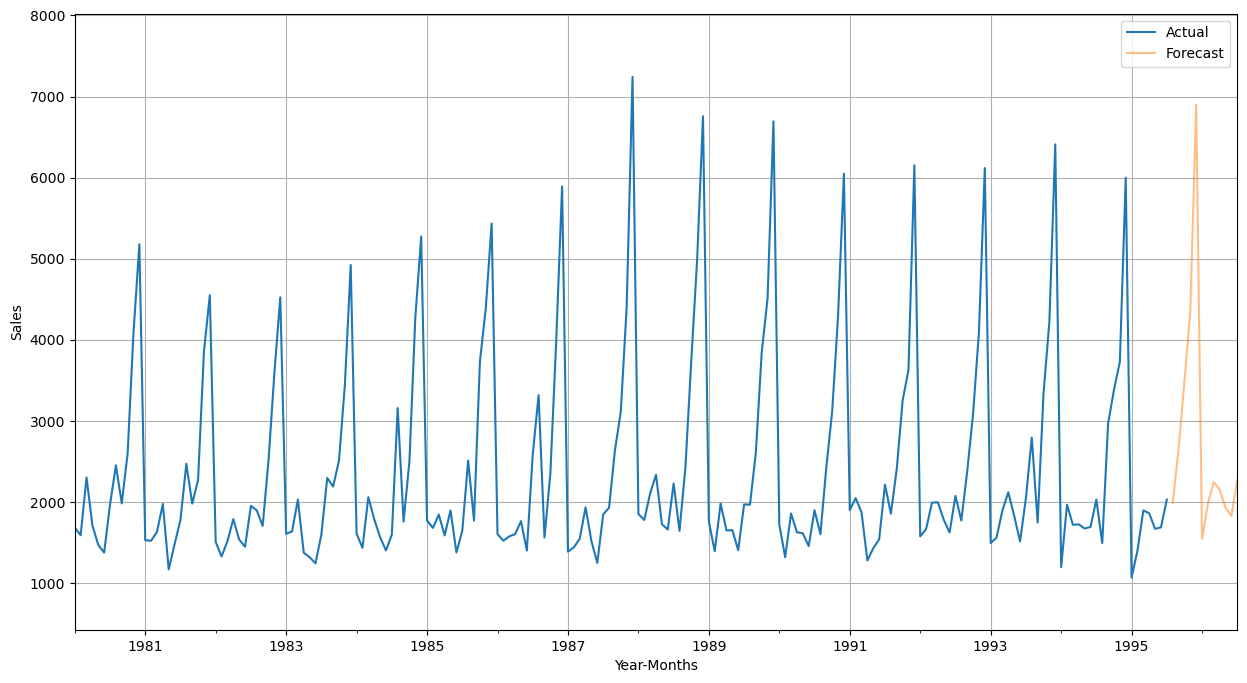

In [176]:
# plot the forecast along with the confidence band

axis = Sparkling_df['Sales'].plot(label='Actual', figsize=(15,8))
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

* 1 year into the future are shown in orange colour, while the confidence interval has been shown in grey colour.

**Insights and recommendations:**
- People tend to buy more sparkling wine in December. That's a great time to make sure we have enough stock and to advertise more.
- Some years, October and November sales stay the same. But after certain years, things change. It's important to understand why to prepare better for those changes.
- When we hold events or tastings in our store, more people come in and buy. So, doing more events could help sell more.
- Some years had big changes after a certain time. Keeping an eye on these years might help us spot things we can do to keep sales up.
- Sometimes, the easiest way to guess sales is the best. We should use simple methods that still give us good guesses.
- By using both old information and our guesses about the future, we can change our plans quickly. This means we're ready for whatever happens and can do better business.
- The sales data exhibits clear seasonal patterns with a notable increase in December sales across all years. Additionally, while there's an overall upward trend until the peak years of 1988–1989, there's a subsequent decline in sales in the years that follow. The choice of the multiplicative model is supported by the observed data patterns, showcasing both seasonality and trend effects.

## END